**Breast Cancer Wisconsin (Diagnostic)**

This project looks to create a classification model to predict the class of a tumor (Malignant and Benign). The model of classification will be build based on characteristics of the cell nuclei present in an ensemble of images. The dataset is loaded from Scikit-Learn dataset, but we also find in [UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) repository.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

In [3]:
type(cancer_data) # Cancer_data is a Bunch, it means a Pyton Dictionary.

sklearn.utils.Bunch

## Keys of the dictionary

In [4]:
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

# Dataset description

In [7]:
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Features names

In [8]:
print(cancer_data['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Target names and values

In [12]:
print(cancer_data['target_names'])

['malignant' 'benign']


In [13]:
print(cancer_data['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

# Exploratory Data Analysis (EDA)

## Creating the Dataframe


In [14]:
cancer_df = pd.DataFrame(np.c_[cancer_data['data'], cancer_data['target']], columns=np.append(cancer_data['feature_names'],['target']))
# Here we employed np.c_ to joint the feature with the target, to assign the columns names we utilize np.append and we pass the respectives keys

### Visualizing the head, tail and some statistical informations about the dataframe

In [17]:
cancer_df.shape

(569, 31)

In [15]:
cancer_df.head(10)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710         0.2419   
1           0.07864         0.08690              0.07017         0.1812   
2           0.15990         0.19740              0.12790         0.2069   
3           0.28390         0.24140              0.10520         0.2597   
4           0.13280         0.19800              0.10430         0.1809   
5           0.17000         0.15780              0.08089         0.2087   
6           0.10900         0.11270              0.07400         0.1794   
7           0.16450         0.09366              0.05985         0.2196   
8           0.19320         0.18590              0.09353         0.2350   
9           0.23960         0.22730              0.08543         0.2030   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   
5                 0.07613  ...          23.75           103.40       741.6   
6                 0.05742  ...          27.66           153.20      1606.0   
7                 0.07451  ...          28.14           110.60       897.0   
8                 0.07389  ...          30.73           106.20       739.3   
9                 0.08243  ...          40.68            97.65       711.4   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   
5            0.1791             0.5249           0.5355                0.1741   
6            0.1442             0.2576           0.3784                0.1932   
7            0.1654             0.3682           0.2678                0.1556   
8            0.1703             0.5401           0.5390                0.2060   
9            0.1853             1.0580           1.1050                0.2210   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  
5          0.3985                  0.12440     0.0  
6          0.3063                  0.08368     0.0  
7          0.3196                  0.11510     0.0  
8          0.4378                  0.10720     0.0  
9          0.4366                  0.20750     0.0  

[10 r

In [16]:
cancer_df.tail(10)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
559        11.51         23.93           74.52      403.5          0.09261   
560        14.05         27.15           91.38      600.4          0.09929   
561        11.20         29.37           70.67      386.0          0.07449   
562        15.22         30.62          103.40      716.9          0.10480   
563        20.92         25.09          143.00     1347.0          0.10990   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
559           0.10210         0.11120              0.04105         0.1388   
560           0.11260         0.04462              0.04304         0.1537   
561           0.03558         0.00000              0.00000         0.1060   
562           0.20870         0.25500              0.09429         0.2128   
563           0.22360         0.31740              0.14740         0.2149   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
559                 0.06570  ...          37.16            82.28       474.2   
560                 0.06171  ...          33.17           100.20       706.7   
561                 0.05502  ...          38.30            75.19       439.6   
562                 0.07152  ...          42.79           128.70       915.0   
563                 0.06879  ...          29.41           179.10      1819.0   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
559           0.12980            0.25170           0.3630   
560           0.12410            0.22640           0.1326   
561           0.09267            0.05494           0.0000   
562           0.14170            0.79170           1.1700   
563           0.14070            0.41860           0.6599   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
559               0.09653          0.2112                  0.08732     1.0  
560               0.10480          0.2250                  0.08321     1.0  
561               0.00000          0.1566                  0.05905     1.0  
562               0.23560          0.4089                  0.14090     0.0  
563               0.25420          0.2929                  0.09873     0.0  
564               0.22160          0.2060                  0.07115     0.0  
565               0.16280          0.2572                  0.06637     0.0  
566               0.14180          0.2218                  0.07820     0.0  
567               0.26500          0.4087           

In [18]:
cancer_df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

## Visualizing some statistical informations

### Frequency of target variable

In [19]:
cancer_df['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

/home/igor/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

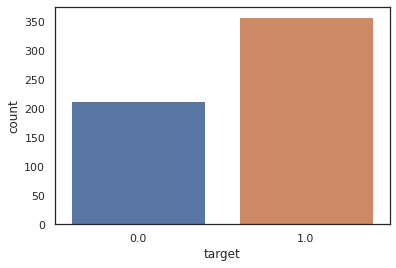

In [105]:
sns.countplot(cancer_df['target'])

### Histogram of numerical variables

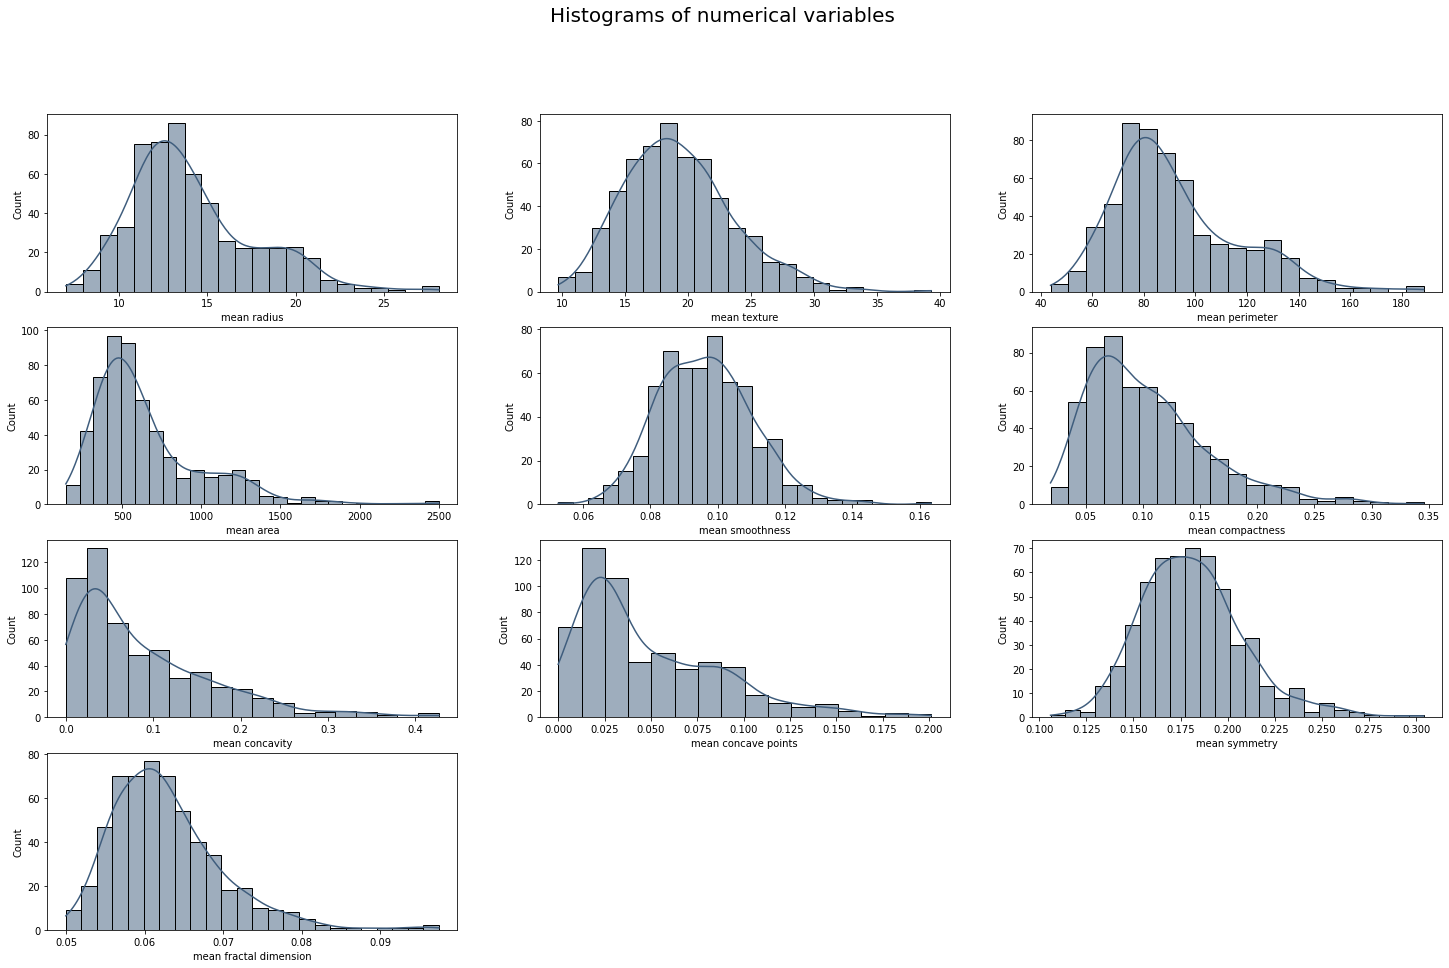

In [32]:
plt.figure(figsize=(25,15))
plt.suptitle('Histograms of numerical variables', fontsize = 20)
for i in range(1, 11):
    plt.subplot(4, 3, i)
    f = plt.gca()
    sns.histplot(cancer_df.iloc[:, i-1], color = '#3F5D7D', kde= True)

### Histogram of numerical variables according the target

#### Histogram of numerical variables according the target (Mean values)

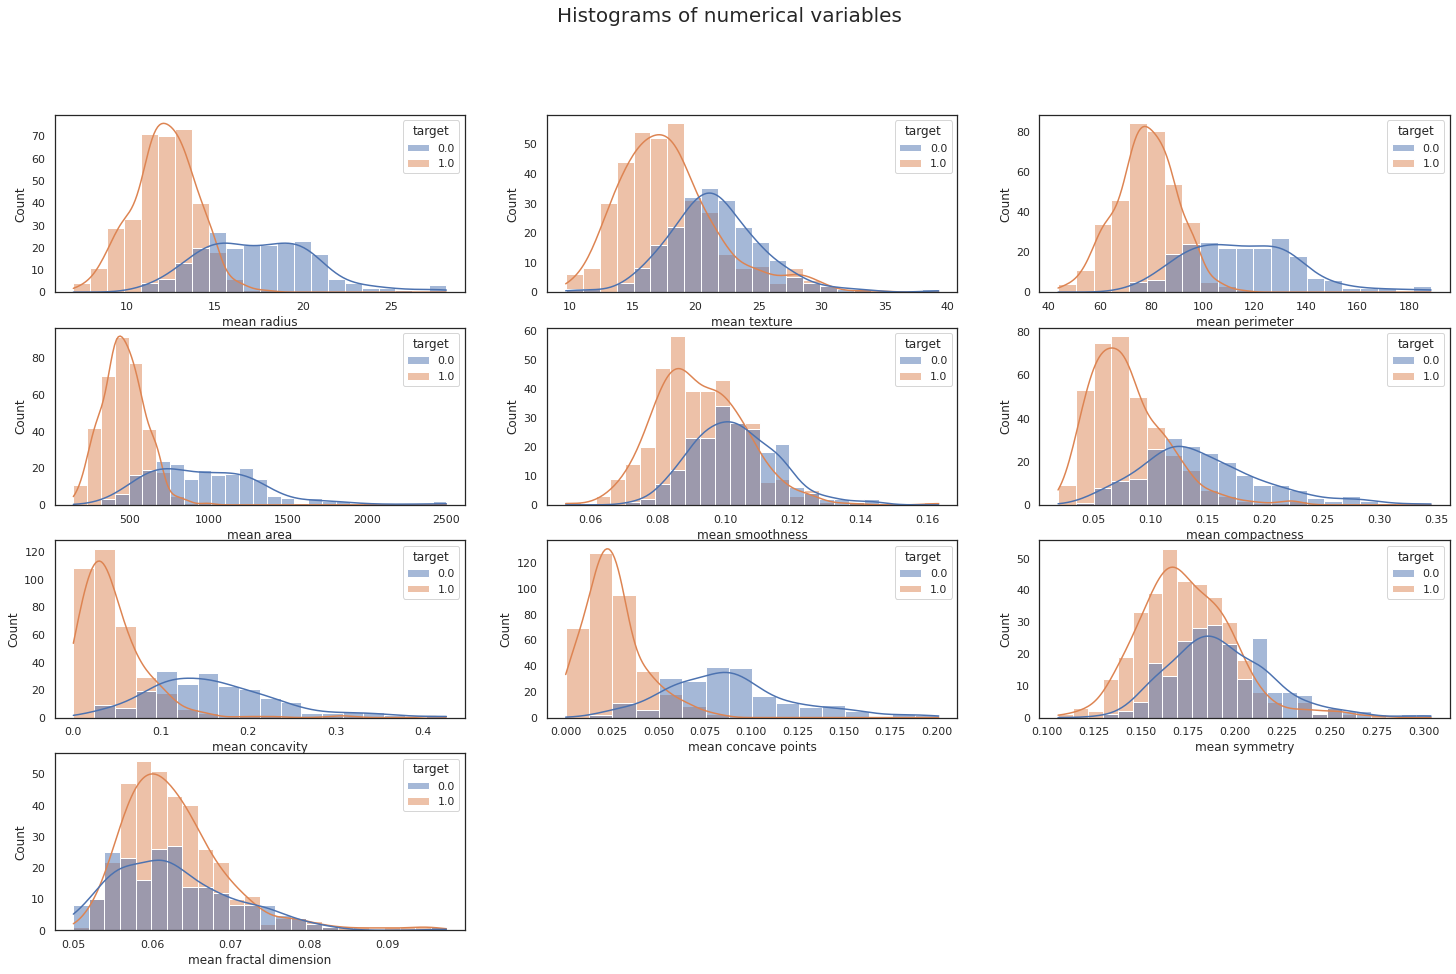

In [94]:
plt.figure(figsize=(25,15))
plt.suptitle('Histograms of numerical variables', fontsize = 20)
for i in range(1, 11):
    plt.subplot(4, 3, i)
    f = plt.gca()
    sns.histplot(data=cancer_df, x=cancer_df.iloc[:, i-1], hue='target', kde = True)

#### Histogram of numerical variables according the target (Standard error values)

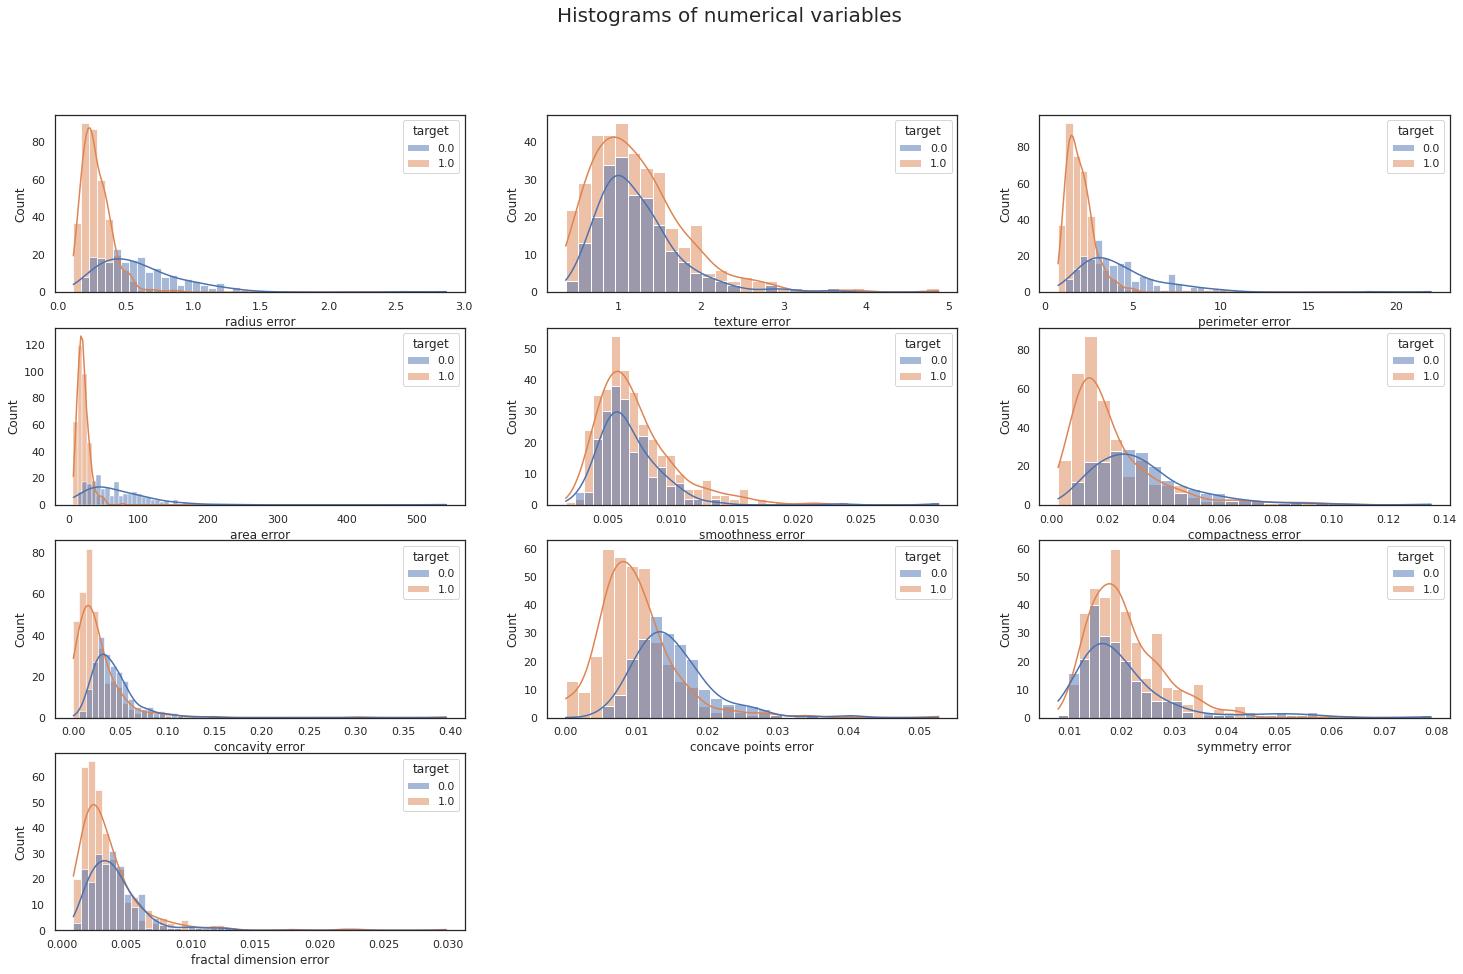

In [99]:
plt.figure(figsize=(25,15))
plt.suptitle('Histograms of numerical variables', fontsize = 20)
for i in range(11, 21):
    plt.subplot(4, 3, i-10)
    f = plt.gca()
    sns.histplot(data=cancer_df, x=cancer_df.iloc[:, i-1], hue='target', kde = True)

#### Histogram of numerical variables according the target (worst/largest values)

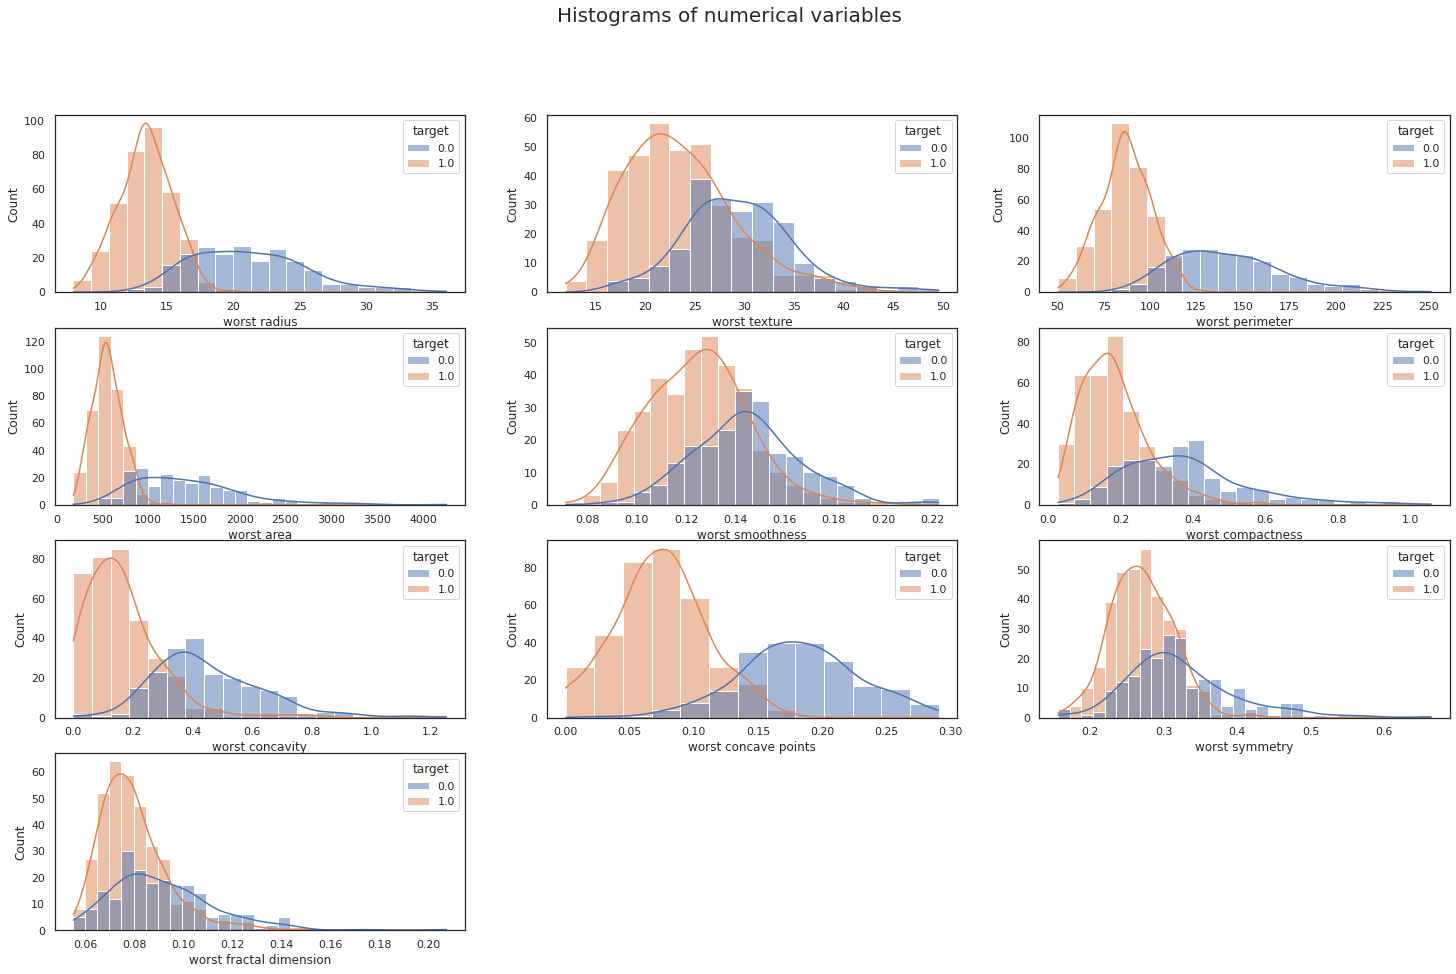

In [100]:
plt.figure(figsize=(25,15))
plt.suptitle('Histograms of numerical variables', fontsize = 20)
for i in range(21, 31):
    plt.subplot(4, 3, i-20)
    f = plt.gca()
    sns.histplot(data=cancer_df, x=cancer_df.iloc[:, i-1], hue='target', kde = True)

### Correlation
The correlation is a important step to understand the relation between the feature values, it implicates how much a certain variable depends on other variable.

#### Correlation with the target variable (mean values)

In [121]:
column_drop = [cancer_data.feature_names[i] for i in range(10, 30)]
column_drop.append('target')

<AxesSubplot:title={'center':'Correlation with reponse variable'}>

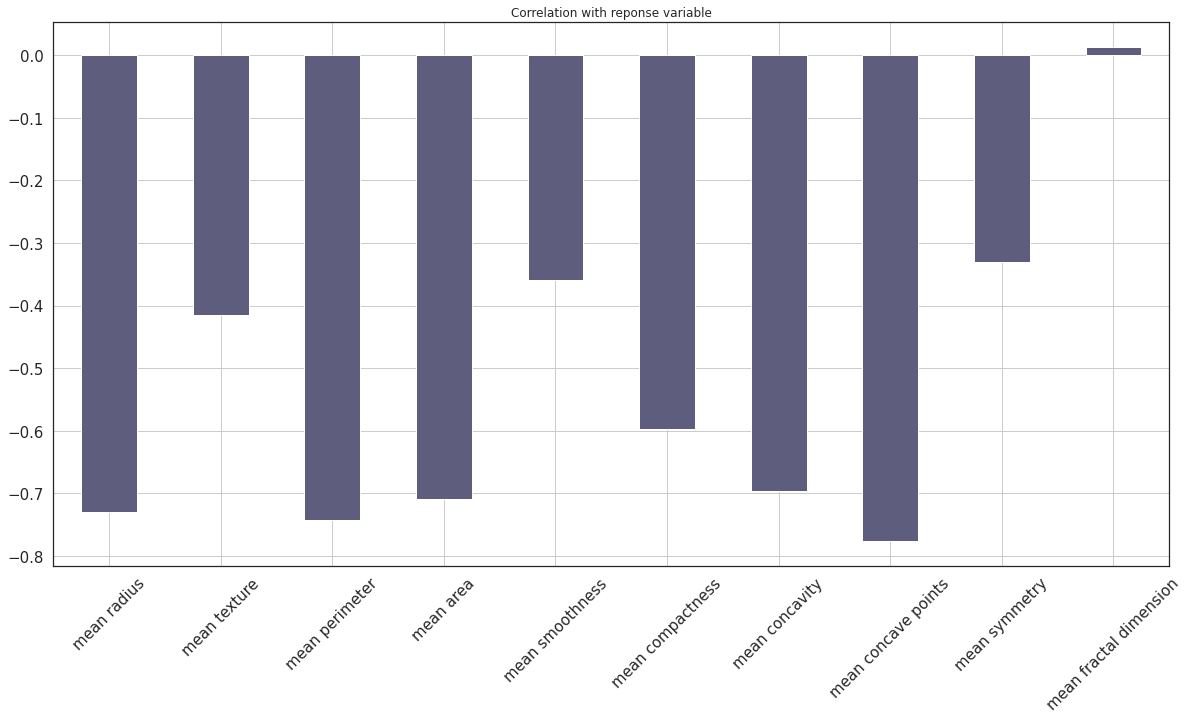

In [122]:
cancer_df.drop(columns=column_drop).corrwith(cancer_df.target).plot.bar(figsize = (20,10),
                                            title = 'Correlation with reponse variable',
                                            fontsize = 15, rot = 45, grid = True, color = '#5F5D7D')

#### Matrix correlation between independent variables

<AxesSubplot:>

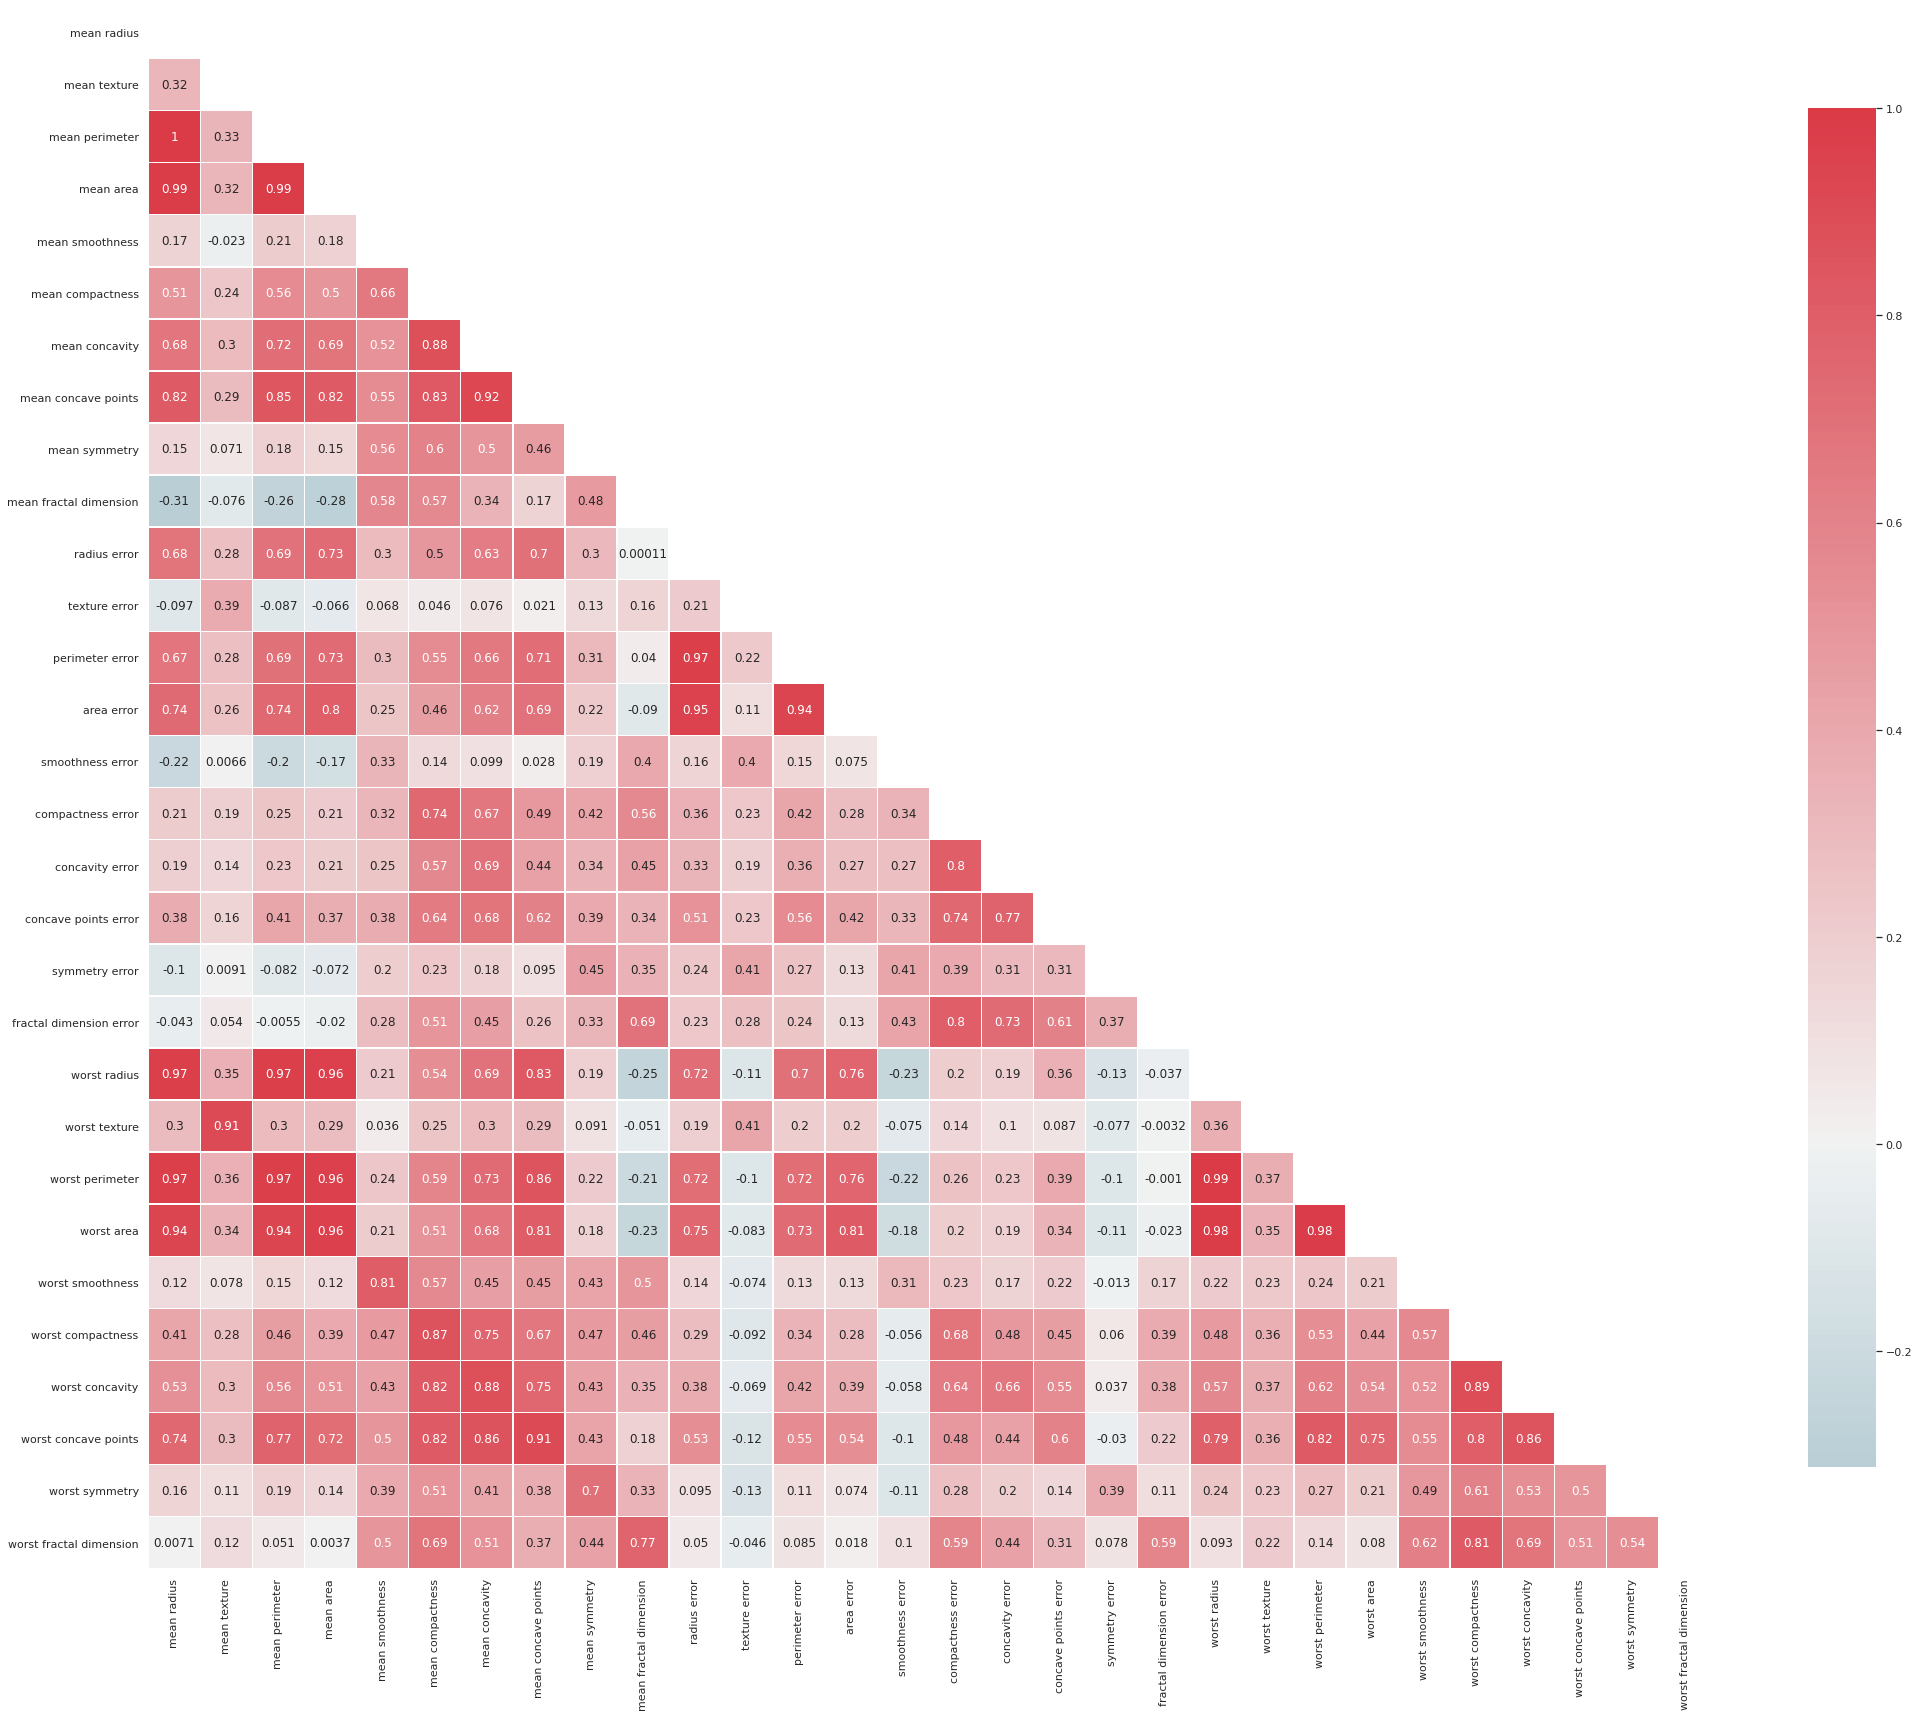

In [72]:
sns.set(style="white") # Setting the image style
corr = cancer_df.drop(columns='target').corr() # Creating the corralation 
mask = np.zeros_like(corr, dtype=np.bool) # Creating the triangle
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(35, 50)) # Creating the plot
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Setting the colors
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True) # Creating and setting the heatmap

##### Matrix correlation between independent variables (Means values)

In [ ]:
columns_c = [cancer_df.columns[i] for i in range (0, 10)] # Creating a list with the desired columns

<AxesSubplot:>

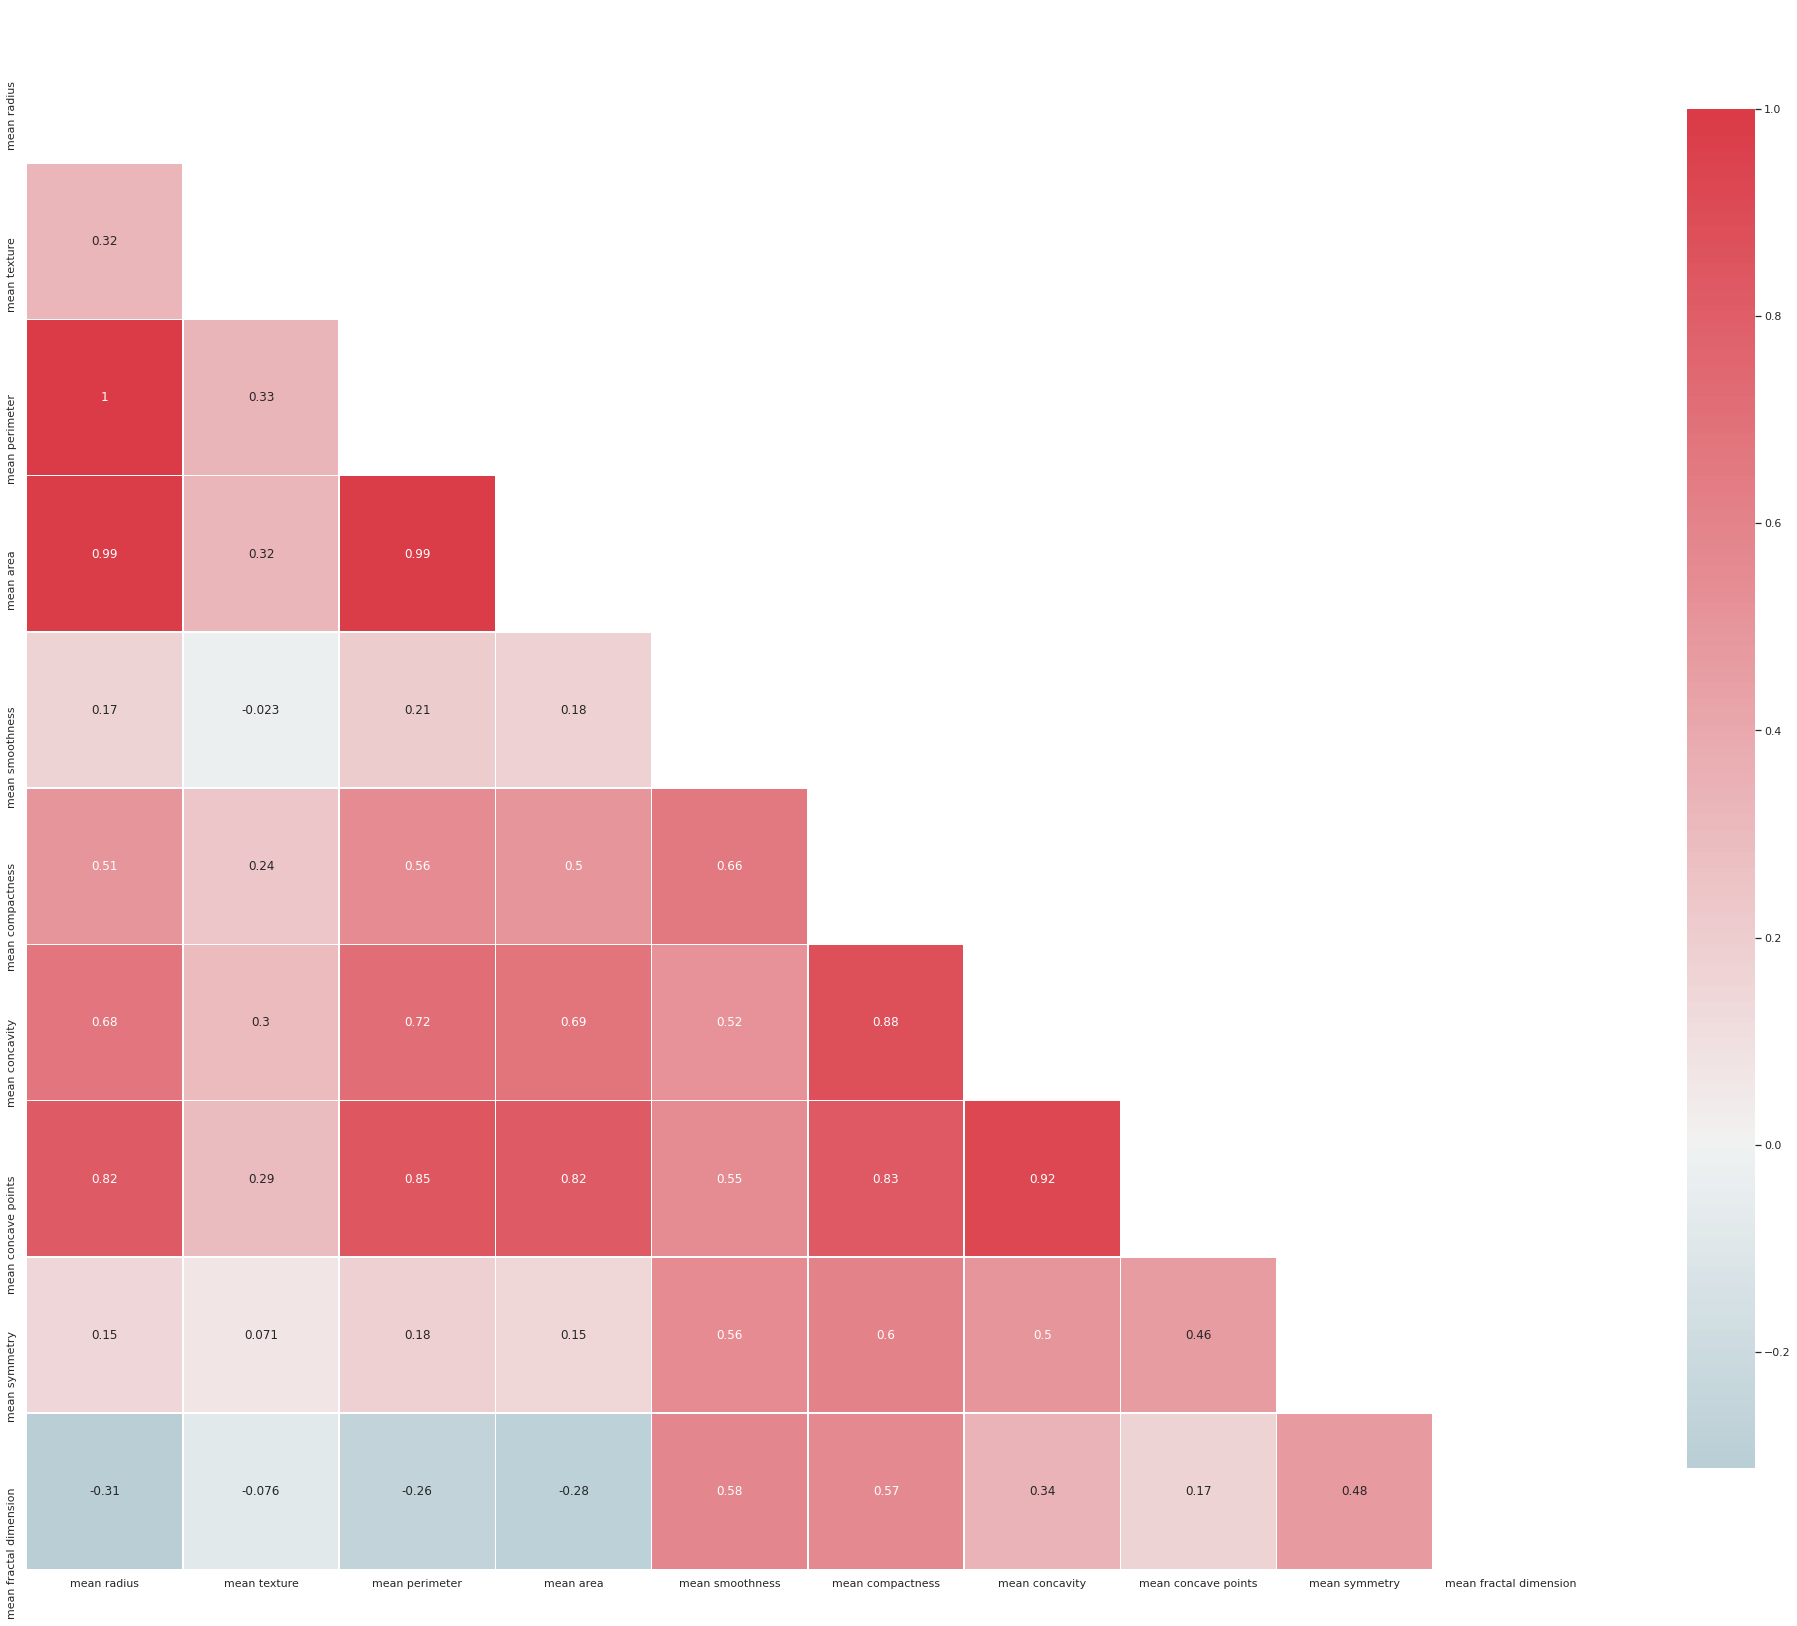

In [71]:
sns.set(style="white")
corr_1 = cancer_df[columns_c].corr()
mask = np.zeros_like(corr_1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(35, 50))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_1, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

##### Matrix correlation between independent variables (Standard error values)

In [73]:
columns_c1 = [cancer_df.columns[i] for i in range (10, 20)] # Creating a list with the desired columns

<AxesSubplot:>

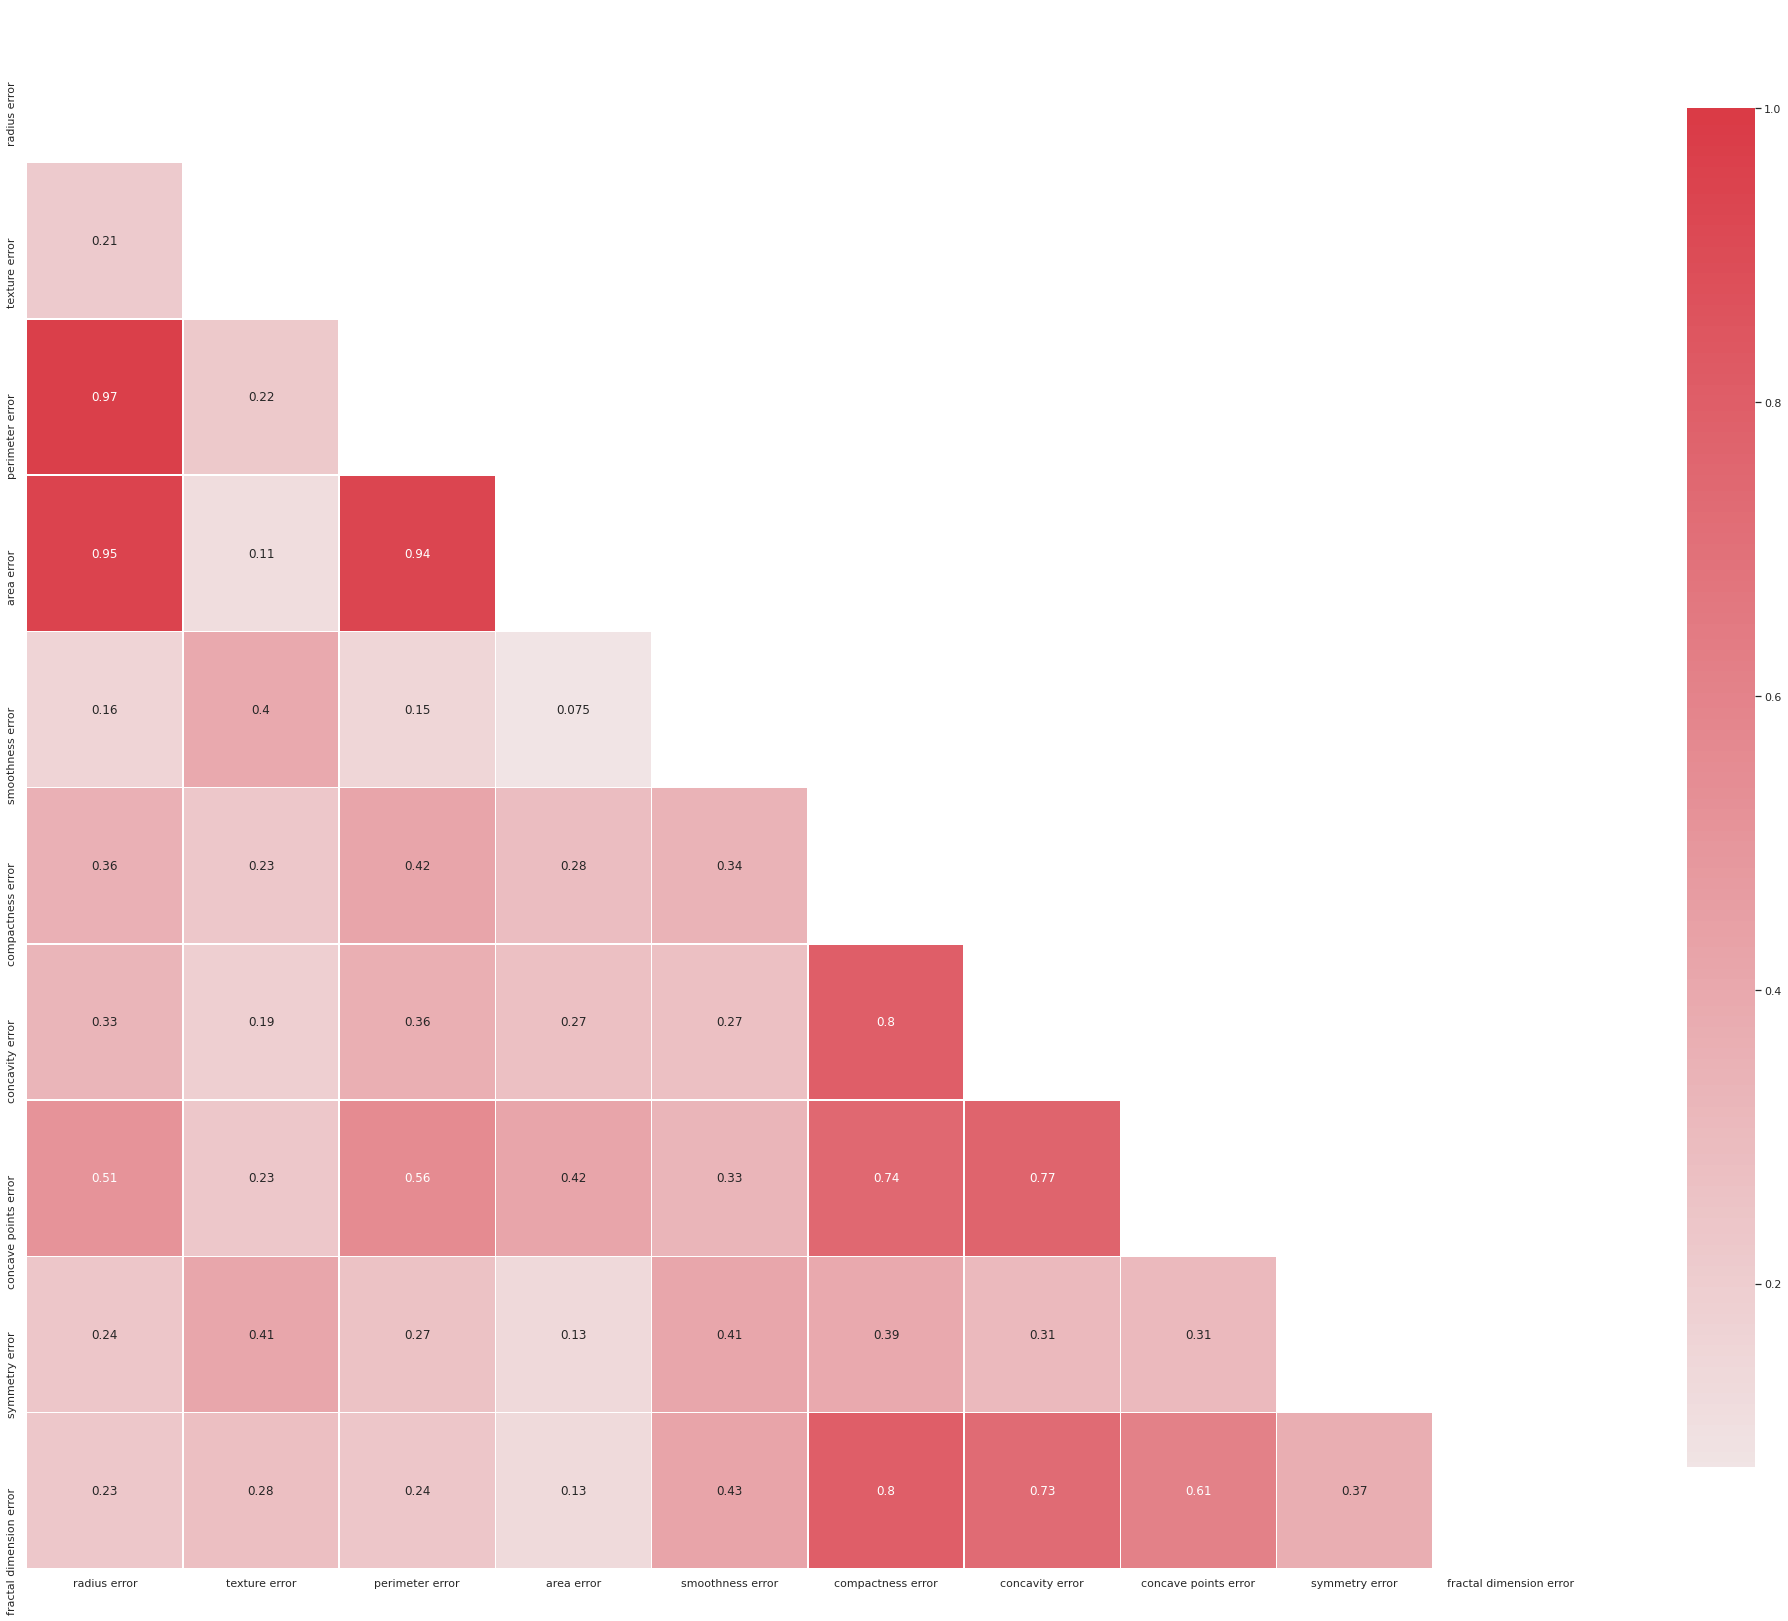

In [77]:
sns.set(style="white")
corr_2 = cancer_df[columns_c1].corr()
mask = np.zeros_like(corr_2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(35, 50))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_2, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

##### Matrix correlation between independent variables (worst/largest values)

In [78]:
columns_c2 = [cancer_df.columns[i] for i in range (20, 30)] # Creating a list with the desired columns

<AxesSubplot:>

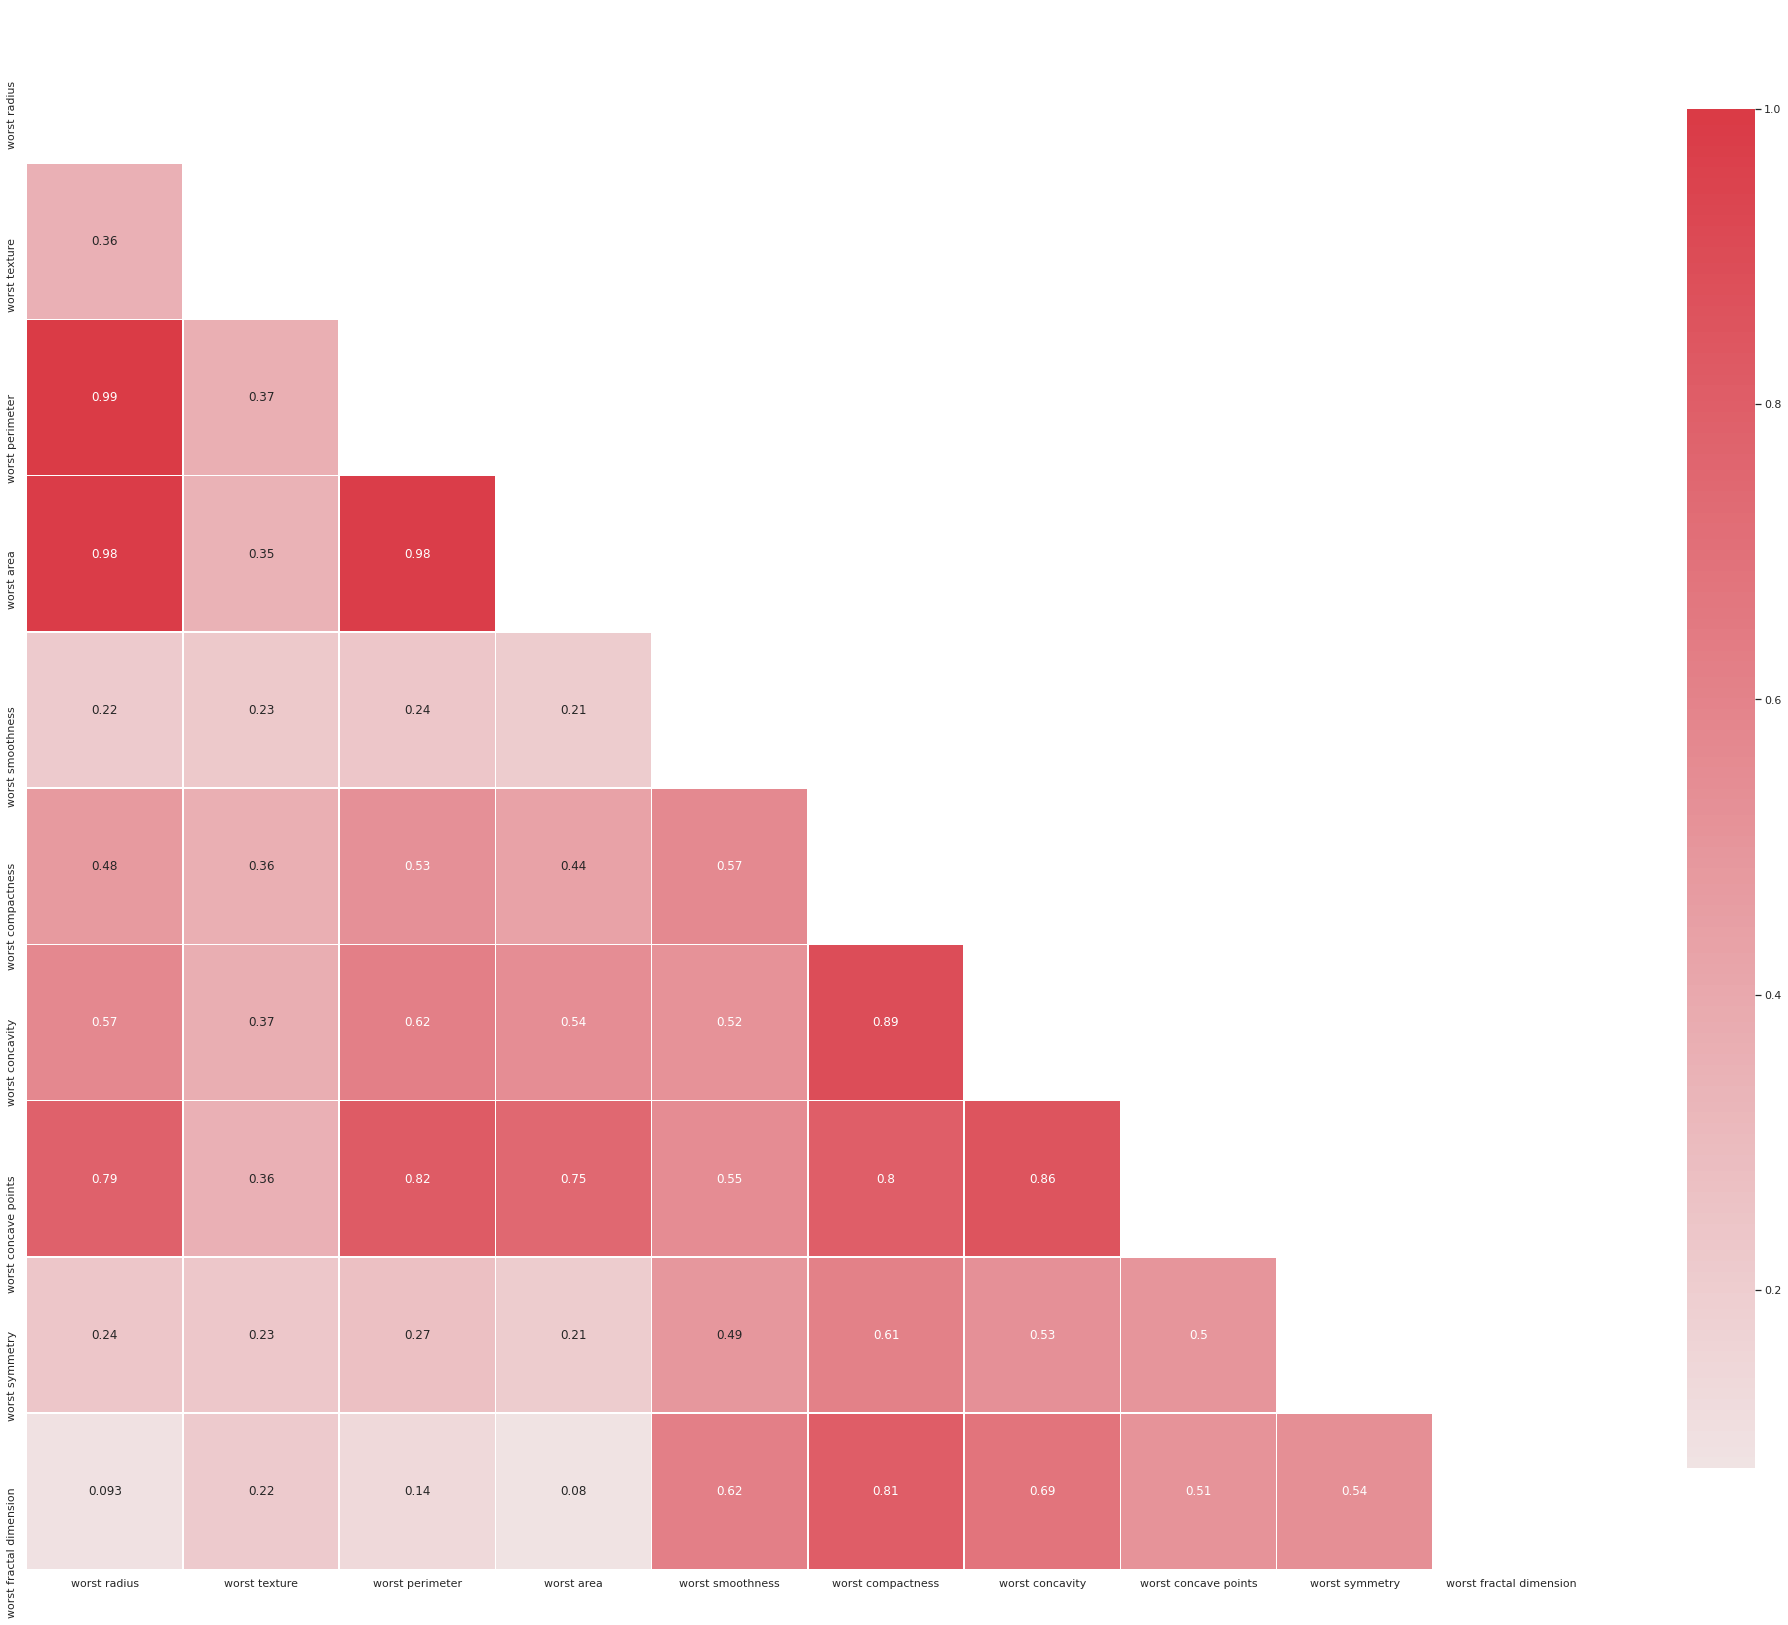

In [81]:
sns.set(style="white")
corr_3 = cancer_df[columns_c2].corr()
mask = np.zeros_like(corr_3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(35, 50))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_3, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

## Pairplot (Distribution and scatter plot)
Here we select the variable that has high correletion with one other, we can see these variable in the graphic above.

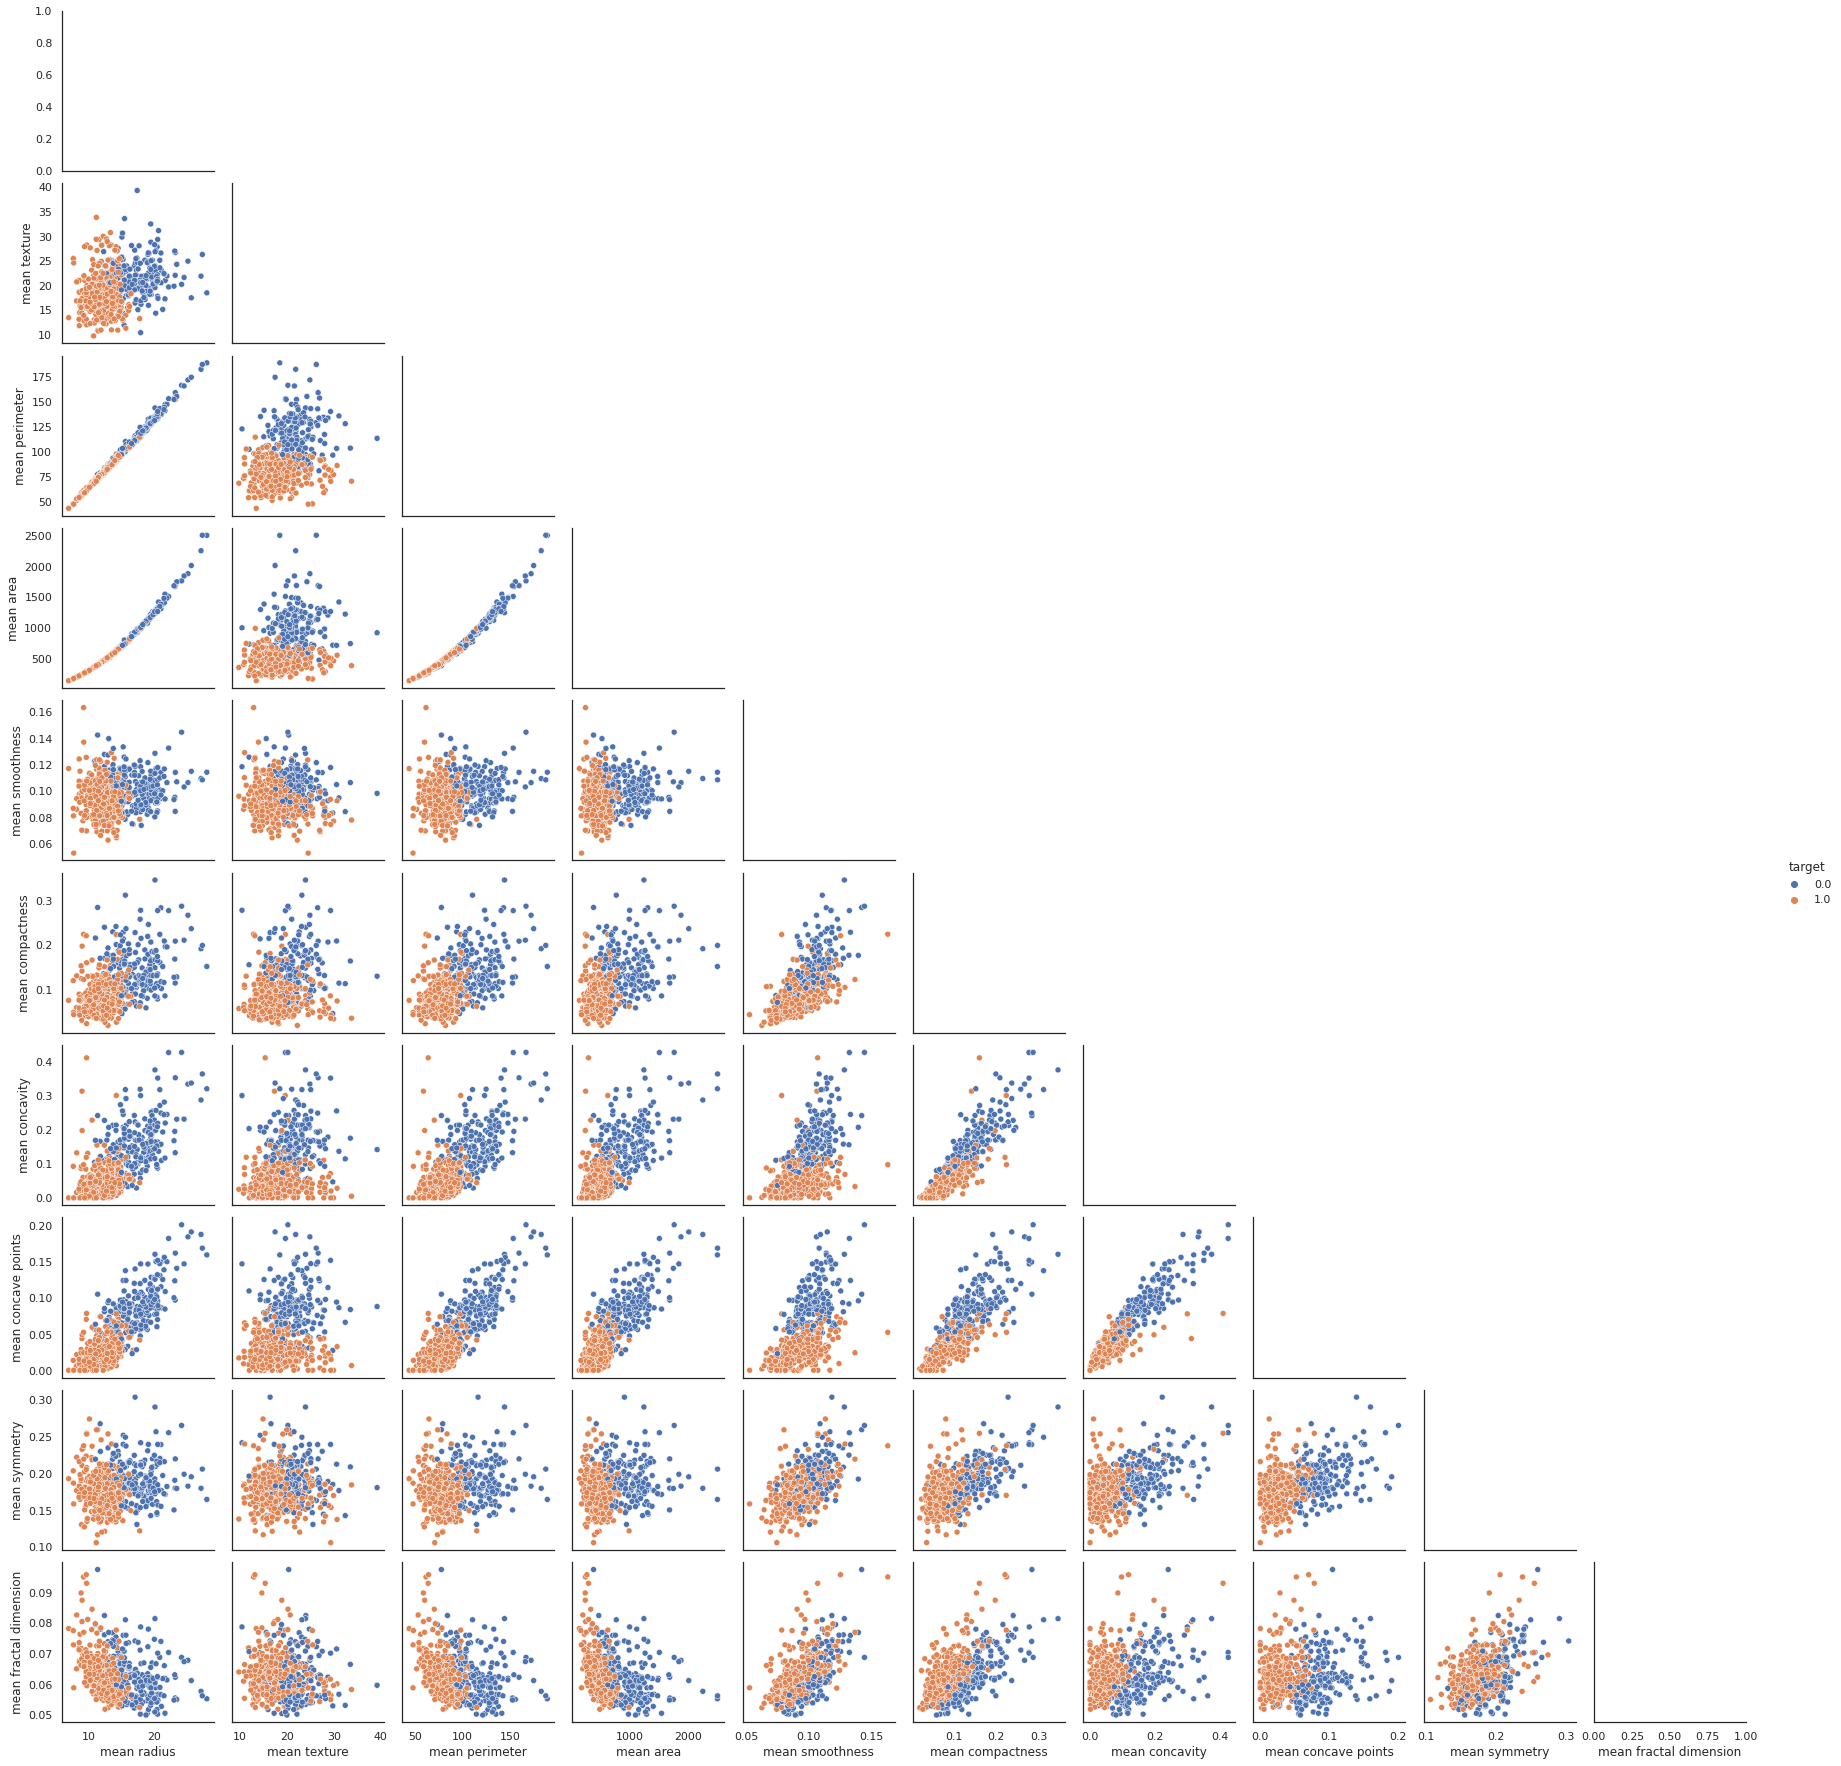

In [116]:
sns.pairplot(cancer_df[columns_c], hue = 'target', kind = 'scatter', corner=True, diag_kind='None')

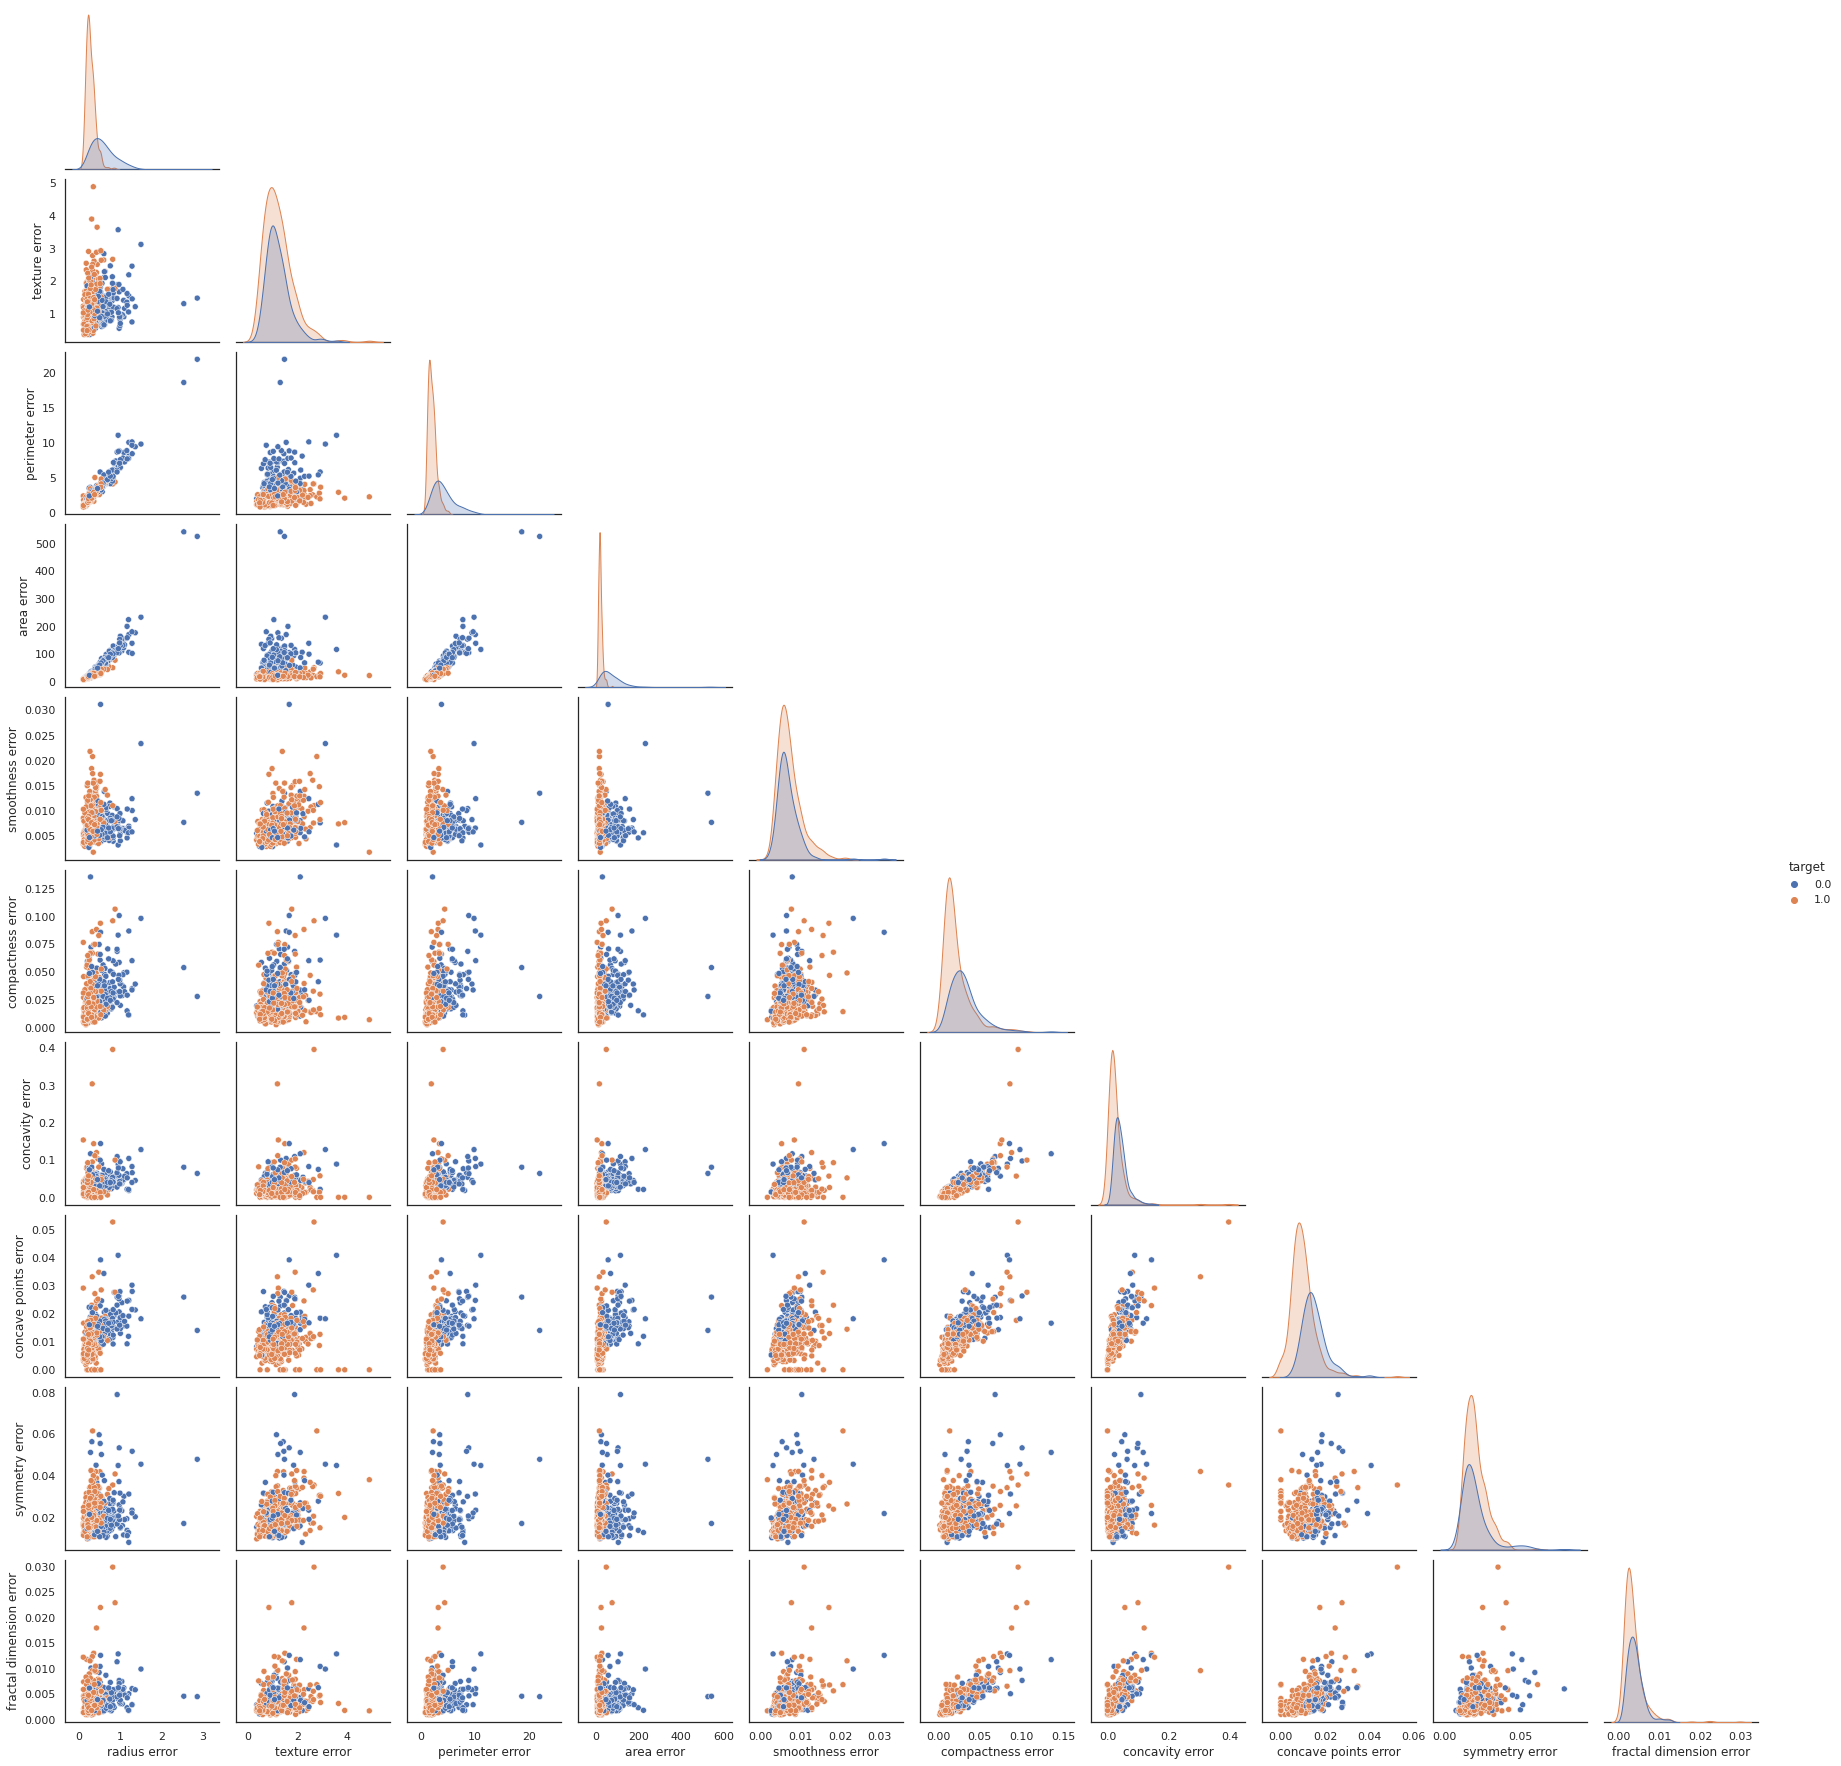

In [89]:
columns_c1.append('target')
sns.pairplot(cancer_df[columns_c1], hue = 'target', corner=True)

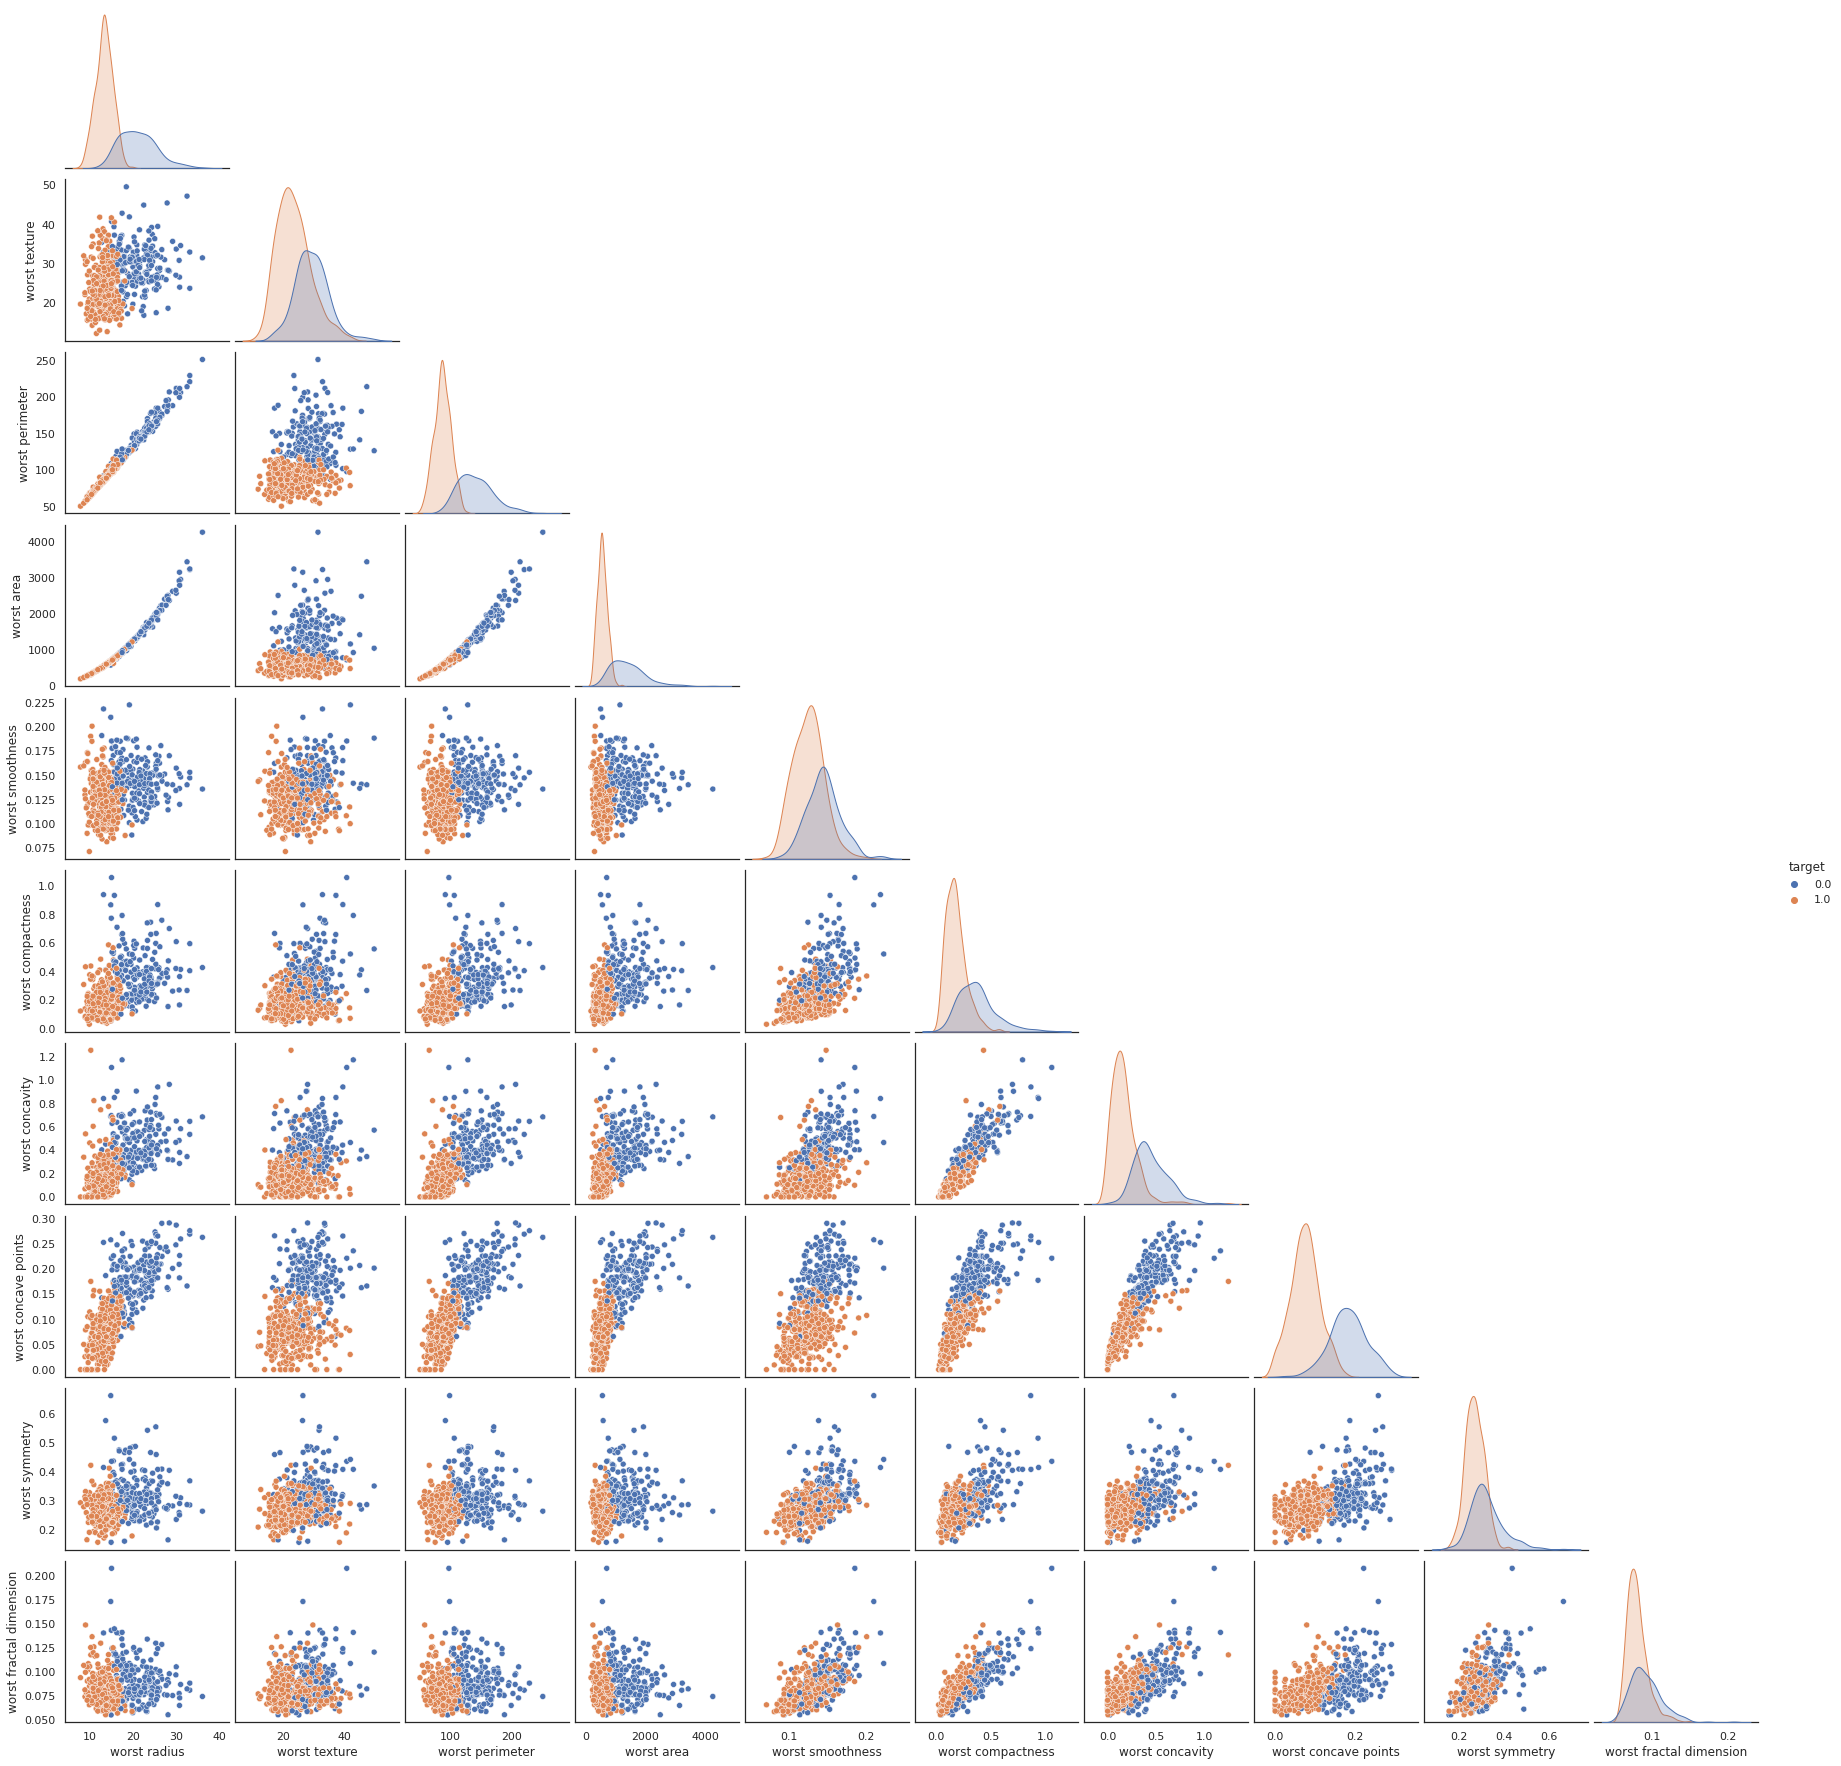

In [90]:
columns_c2.append('target')
sns.pairplot(cancer_df[columns_c2], hue = 'target', corner=True)

From the graphic we can conclude that all these features present different distribution beteen the the target variable, it means that each feature preseted here has an importance to model and must be considered to train the model of selection prediction.

## Scatter plot
Here, we visualize the scatter plot for the features that have correlation 1 and 0.99.
We have these graphics above, but here is more zoomed.

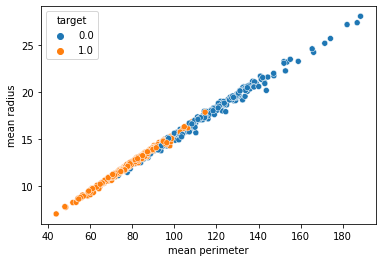

In [20]:
sns.scatterplot(x = 'mean perimeter', y = 'mean radius', hue = 'target', data = cancer_df)

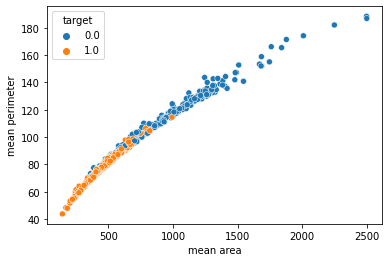

In [21]:
sns.scatterplot(x ='mean area' , y = 'mean perimeter', hue = 'target', data = cancer_df)

Maybe I'll put an explanation here to describe better the statistical feature.

# Model Setting
Here we define the independent and dependent variables, training and test set. We apply feature scaling

## Independent and Dependent Variables

In [22]:
X = cancer_df.drop(['target'], axis = 1)
y = cancer_df['target']

## Splitting the Dataset into Training and Test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Training and Selection Model

# Training the model

In [25]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, y_train)

# K Nearest Nieghbors

from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors= 5, metric='minkowski', p = 2)
classifier2.fit(X_train, y_train)

# Support Vector Machine - Linear Classifier

from sklearn.svm import SVC
classifier3 = SVC(kernel= 'linear', random_state=0)
classifier3.fit(X_train, y_train)

# Kernel Support Vector Machine

from sklearn.svm import SVC
classifier4 = SVC(kernel='rbf', random_state=0)
classifier4.fit(X_train, y_train)

# Naïves Bayes Classification

from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train, y_train)

# Decision Tree Classification

from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier6.fit(X_train, y_train)

# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
classifier7 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
classifier7.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Predicting the test result

In [26]:
y_pred1 = classifier1.predict(X_test)
y_pred2 = classifier2.predict(X_test)
y_pred3 = classifier3.predict(X_test)
y_pred4 = classifier4.predict(X_test)
y_pred5 = classifier5.predict(X_test)
y_pred6 = classifier5.predict(X_test)
y_pred7 = classifier7.predict(X_test)

## Selection Model

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)
cm4 = confusion_matrix(y_test, y_pred4)
cm5 = confusion_matrix(y_test, y_pred5)
cm6 = confusion_matrix(y_test, y_pred6)
cm7 = confusion_matrix(y_test, y_pred7)
print('Checking Confusion Matrix to a single observation')
print('Logistic Regression Classification')
print(cm1)
print(classification_report(y_test,y_pred1))
print('\n')
print('K Nearest Neighbors')
print(cm2)
print(classification_report(y_test,y_pred2))
print('\n')
print('Support Vector Machine')
print(cm3)
print(classification_report(y_test,y_pred3))
print('\n')
print('Kernel Support Vector Machine')
print(cm4)
print(classification_report(y_test,y_pred4))
print('\n')
print('Naive Bayes Classification')
print(cm5)
print(classification_report(y_test,y_pred5))
print('\n')
print('Decision Tree Classification')
print(cm6)
print(classification_report(y_test,y_pred6))
print('\n')
print('Random Forest Classification')
print(cm7)
print(classification_report(y_test,y_pred7))
print('\n')

Checking Confusion Matrix to a single observation
Logistic Regression Classification
[[44  3]
 [ 2 65]]
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        47
         1.0       0.96      0.97      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



K Nearest Neighbors
[[43  4]
 [ 0 67]]
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.96        47
         1.0       0.94      1.00      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Support Vector Machine
[[45  2]
 [ 1 66]]
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        47
         1.0       0.97      0.99      0.98     

In [28]:
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)
accuracies2 = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10)
accuracies3 = cross_val_score(estimator = classifier3, X = X_train, y = y_train, cv = 10)
accuracies4 = cross_val_score(estimator = classifier4, X = X_train, y = y_train, cv = 10)
accuracies5 = cross_val_score(estimator = classifier5, X = X_train, y = y_train, cv = 10)
accuracies6 = cross_val_score(estimator = classifier6, X = X_train, y = y_train, cv = 10)
accuracies7 = cross_val_score(estimator = classifier7, X = X_train, y = y_train, cv = 10)

print('Checking K-Fold Cross Validation')
print('\n')
print('Logistic Regression Classification')
print("Accuracy: {:.2f} %".format(accuracies1.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies1.std()*100))
print('\n')
print('K Nearest Neighbors')
print("Accuracy: {:.2f} %".format(accuracies2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies2.std()*100))
print('\n')
print('Support Vector Machine')
print("Accuracy: {:.2f} %".format(accuracies3.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies3.std()*100))
print('\n')
print('Kernel Support Vector Machine')
print("Accuracy: {:.2f} %".format(accuracies4.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies4.std()*100))
print('\n')
print('Naive Bayes Classification')
print("Accuracy: {:.2f} %".format(accuracies5.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies5.std()*100))
print('\n')
print('Decision Tree Classification')
print("Accuracy: {:.2f} %".format(accuracies6.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies6.std()*100))
print('\n')
print('Random Forest Classification')
print("Accuracy1: {:.2f} %".format(accuracies7.mean()*100))
print("Standard1 Deviation: {:.2f} %".format(accuracies7.std()*100))

Checking K-Fold Cross Validation


Logistic Regression Classification
Accuracy: 97.81 %
Standard Deviation: 1.98 %


K Nearest Neighbors
Accuracy: 96.49 %
Standard Deviation: 1.76 %


Support Vector Machine
Accuracy: 97.15 %
Standard Deviation: 1.98 %


Kernel Support Vector Machine
Accuracy: 97.59 %
Standard Deviation: 1.53 %


Naive Bayes Classification
Accuracy: 94.96 %
Standard Deviation: 2.38 %


Decision Tree Classification
Accuracy: 91.88 %
Standard Deviation: 3.06 %


Random Forest Classification
Accuracy1: 96.27 %
Standard1 Deviation: 2.79 %


Here we select the three best score, we consider the accuracy score and we analize the Standard Deviation, results with high Deviation, can descondered, it depend on the accuracy score.
For this model we select 


1.   Logistic Regression
2.   Support Vector Machine
3.   Kernel Support Vector Machine





# Boosting the model

The final step to select our model is to boost the hyper parameters using GridSearchCV. After, we apply again the Cross Value Score. 

## Setting the parameters 

Here I need to put an explanation about each parameters

In [93]:
param_grid1 = {'C' : [0.001, 0.01, 0.1, 1 , 10, 100], 'solver' : ['newton-cg', 'sag', 'saga','lbfgs' ], 'max_iter' : [10000]}
param_grid2 = {'C' : [0.001, 0.01, 0.1, 1 , 10, 100],'kernel': ['linear']} # Support Vector Machine
param_grid3 = {'C': [0.1, 1, 10, 100], 'gamma': [100, 10, 1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']} # Kernel Support Vector Machine

## Searching the best parameters and training the models

In [94]:
from sklearn.model_selection import GridSearchCV

grid1 = GridSearchCV(classifier1, param_grid1, cv = 10, verbose = 4)
grid2 = GridSearchCV(classifier3, param_grid2, verbose = 4)
grid3 = GridSearchCV(classifier4, param_grid3, verbose = 4)

# Traing the models with the best parameters

class_boost_1 = grid1.fit(X_train,y_train)
class_boost_2 = grid2.fit(X_train,y_train)
class_boost_3 = grid3.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] C=0.001, max_iter=10000, solver=newton-cg .......................
[CV]  C=0.001, max_iter=10000, solver=newton-cg, score=0.870, total=   0.0s
[CV] C=0.001, max_iter=10000, solver=newton-cg .......................
[CV]  C=0.001, max_iter=10000, solver=newton-cg, score=0.913, total=   0.0s
[CV] C=0.001, max_iter=10000, solver=newton-cg .......................
[CV]  C=0.001, max_iter=10000, solver=newton-cg, score=0.870, total=   0.0s
[CV] C=0.001, max_iter=10000, solver=newton-cg .......................
[CV]  C=0.001, max_iter=10000, solver=newton-cg, score=0.891, total=   0.0s
[CV] C=0.001, max_iter=10000, solver=newton-cg .......................
[CV]  C=0.001, max_iter=10000, solver=newton-cg, score=0.870, total=   0.0s
[CV] C=0.001, max_iter=10000, solver=newton-cg .......................
[CV]  C=0.001, max_iter=10000, solver=newton-cg, score=0.911, total=   0.0s
[CV] C=0.001, max_iter=10000, solver=newton-cg ........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.001, max_iter=10000, solver=newton-cg, score=0.867, total=   0.0s
[CV] C=0.001, max_iter=10000, solver=newton-cg .......................
[CV]  C=0.001, max_iter=10000, solver=newton-cg, score=0.933, total=   0.0s
[CV] C=0.001, max_iter=10000, solver=sag .............................
[CV] . C=0.001, max_iter=10000, solver=sag, score=0.870, total=   0.0s
[CV] C=0.001, max_iter=10000, solver=sag .............................
[CV] . C=0.001, max_iter=10000, solver=sag, score=0.913, total=   0.0s
[CV] C=0.001, max_iter=10000, solver=sag .............................
[CV] . C=0.001, max_iter=10000, solver=sag, score=0.870, total=   0.0s
[CV] C=0.001, max_iter=10000, solver=sag .............................
[CV] . C=0.001, max_iter=10000, solver=sag, score=0.891, total=   0.0s
[CV] C=0.001, max_iter=10000, solver=sag .............................
[CV] . C=0.001, max_iter=10000, solver=sag, score=0.870, total=   0.0s
[CV] C=0.001, max_iter=10000, solver=sag ..........................

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   22.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ............... C=0.01, kernel=linear, score=0.978, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.934, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.978, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.978, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.967, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.978, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.945, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=10, kernel=poly ....................................
[CV] ........ C=0.1, gamma=10, kernel=poly, score=0.967, total=   0.0s
[CV] C=0.1, gamma=10, kernel=poly ....................................
[CV] ........ C=0.1, gamma=10, kernel=poly, score=0.912, total=   0.0s
[CV] C=0.1, gamma=10, kernel=poly ....................................
[CV] ........ C=0.1, gamma=10, kernel=poly, score=0.934, total=   0.0s
[CV] C=0.1, gamma=10, kernel=poly ....................................
[CV] ........ C=0.1, gamma=10, kernel=poly, score=0.945, total=   0.0s
[CV] C=0.1, gamma=10, kernel=poly ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    3.3s finished


## Predicting with the best parameters

In [95]:
boost_predictions1 = class_boost_1.predict(X_test)
boost_predictions2 = class_boost_2.predict(X_test)
boost_predictions3 = class_boost_3.predict(X_test)

# New Results

In [96]:
# Making the Confusion Matrix

cmb1 = confusion_matrix(y_test, boost_predictions1)
cmb2 = confusion_matrix(y_test, boost_predictions2)
cmb3 = confusion_matrix(y_test, boost_predictions3)

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        47
         1.0       0.96      0.97      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

The best parameters for Logistic Regression:
{'C': 1, 'max_iter': 10000, 'solver': 'newton-cg'}


Confusion Matrix


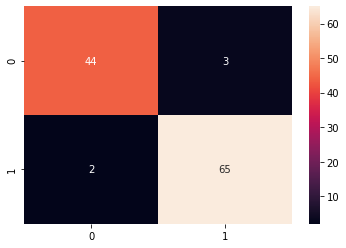

In [97]:
# Results for Logistic Regression

sns.heatmap(cmb1, annot=True)
print(classification_report(y_test,boost_predictions1))
print('The best parameters for Logistic Regression:')
print(grid1.best_params_)
print('\n')
print('Confusion Matrix')

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96        47
         1.0       0.96      0.99      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

The best parameters for Support Vector Machine - Linear:
{'C': 0.1, 'kernel': 'linear'}


Confusion Matrix


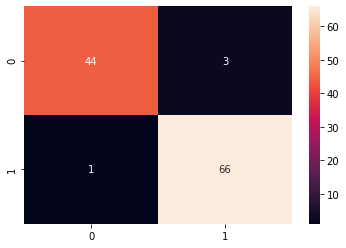

In [98]:
# Results for Support Vector Machine - Linear

sns.heatmap(cmb2, annot=True)
print(classification_report(y_test,boost_predictions2))
print('The best parameters for Support Vector Machine - Linear:')
print(grid2.best_params_)
print('\n')
print('Confusion Matrix')

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        47
         1.0       0.97      1.00      0.99        67

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

The best parameters for Support Vector Machine - Kernel:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


Confusion Matrix


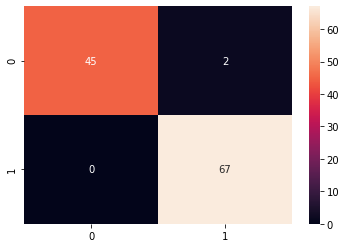

In [99]:
# Results for Support Vector Machine - Kernel

sns.heatmap(cmb3, annot=True)
print(classification_report(y_test,boost_predictions3))
print('The best parameters for Support Vector Machine - Kernel:')
print(grid3.best_params_)
print('\n')
print('Confusion Matrix')

## Average Results

Here I must to explain why I put it

In [100]:
print('Logistic Regression Boosted')
print('Average Accuracy {:.2f}%'.format(grid1.best_score_ * 100))
print('Standard Deviation {:.2f}%'.format(grid1.cv_results_['std_test_score'][grid1.best_index_] * 100))

print('\n')

print('Support Vector Machine - Linear Boosted')
print('Average Accuracy {:.2f}%'.format(grid2.best_score_ * 100))
print('Standard Deviation {:.2f}%'.format(grid2.cv_results_['std_test_score'][grid2.best_index_] * 100))

print('\n')

print('Support Vector Machine - Kernel Boosted')
print('Average Accuracy {:.2f}%'.format(grid3.best_score_ * 100))
print('Standard Deviation {:.2f}%'.format(grid3.cv_results_['std_test_score'][grid3.best_index_] * 100))

Logistic Regression Boosted
Average Accuracy 97.81%
Standard Deviation 1.98%


Support Vector Machine - Linear Boosted
Average Accuracy 97.58%
Standard Deviation 1.89%


Support Vector Machine - Kernel Boosted
Average Accuracy 98.02%
Standard Deviation 2.45%


In [101]:
# Logistic Regression Boosted
classifier1_boosted = LogisticRegression(C = 1, solver ='newton-cg', max_iter = 10000, random_state=0)
classifier1_boosted.fit(X_train, y_train)
y_pred1_boosted = classifier1_boosted.predict(X_test)

# Support Vector Machine Boosted - Linear Classifier


classifier3_boosted = SVC(C = 0.1, kernel= 'linear', random_state=0)
classifier3_boosted.fit(X_train, y_train)

# Kernel Support Vector Machine Boosted - Kernel


classifier4_boosted = SVC(C = 10, gamma = 0.01, kernel='rbf', random_state=0)
classifier4_boosted.fit(X_train, y_train)



SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [102]:
accuracies1_boosted = cross_val_score(estimator = classifier1_boosted, X = X_train, y = y_train, cv = 10)
accuracies2_boosted = cross_val_score(estimator = classifier3_boosted, X = X_train, y = y_train, cv = 10)
accuracies3_boosted = cross_val_score(estimator = classifier4_boosted, X = X_train, y = y_train, cv = 10)

In [103]:
print('Logistic Regression Boosted')
print("Accuracy: {:.2f} %".format(accuracies1_boosted.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies1_boosted.std()*100))

print('\n')

print('Support Vector Machine Boosted - Linear')
print("Accuracy: {:.2f} %".format(accuracies2_boosted.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies2_boosted.std()*100))

print('\n')

print('Support Vector Machine Boosted - kernel')
print("Accuracy: {:.2f} %".format(accuracies3_boosted.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies3_boosted.std()*100))

Logistic Regression Boosted
Accuracy: 97.81 %
Standard Deviation: 1.98 %


Support Vector Machine Boosted - Linear
Accuracy: 97.59 %
Standard Deviation: 1.82 %


Support Vector Machine Boosted - kernel
Accuracy: 98.03 %
Standard Deviation: 2.06 %
